<a href="https://colab.research.google.com/github/rayanethb/DDDM/blob/main/dddm_group_project_students_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# AMPL
%pip install -q amplpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 27.5 MB/s eta 0:00:00


In [ ]:
# Google Colab & Kaggle integration
from amplpy import AMPL, ampl_notebook

ampl = ampl_notebook(
    modules=["highs"],  # modules to install
    license_uuid="default",  # license to use
)  # instantiate AMPL object and register magics

Using default Community Edition License for Colab. Get yours at: https://ampl.com/ce
Licensed to AMPL Community Edition License for the AMPL Model Colaboratory (https://ampl.com/colab).


In [ ]:
%%ampl_eval


#--Model for the Index Construction

#Sets
set tickers;

#Parameters
param q;
param corr{i in tickers, j in tickers};

# --- Variables ---
var x{i in tickers, j in tickers} binary;   # 1 if stock j represents benchmark stock i
var y{j in tickers} binary;                 # 1 if stock j is selected in the reduced index

# --- Objective ---
maximize OFV:
    sum{i in tickers, j in tickers} corr[i,j] * x[i,j];

# --- Constraints ---

# Each benchmark stock i must be represented by exactly one selected stock j
subject to AssignEach_i{i in tickers}:
    sum{j in tickers} x[i,j] = 1;

# You can only assign i to j if j is actually selected (y_j = 1)
subject to Link_x_y{i in tickers, j in tickers}:
    x[i,j] <= y[j];

# Exactly q stocks must be selected in the reduced index
subject to Select_q:
    sum{j in tickers} y[j] = q;
;

In [ ]:
%%ampl_eval
reset data;
data;

# Paste the data from the data and analysis notebook here
# Change the value of q as desired

param q := 5;

set tickers := AAPL ABBV ABT ACN ADBE AIG AMD AMGN AMT AMZN AVGO AXP BA BAC BK BKNG BLK BMY C CAT CHTR CL CMCSA COF COP COST CRM CSCO CVS CVX DE DHR DIS DOW DUK EMR EXC F FDX GD GE GILD GM GOOG GOOGL GS HD HON IBM INTC JNJ JPM KHC KO LIN LLY LMT LOW MA MCD MDLZ MDT MET META MMM MO MRK MS MSFT NEE NFLX NKE NVDA ORCL PEP PFE PG PYPL QCOM RTX SBUX SCHW SO SPG T TGT TMO TMUS TSLA TXN UNH UNP UPS USB V VZ WFC WMT XOM ;

param corr: AAPL ABBV ABT ACN ADBE AIG AMD AMGN AMT AMZN AVGO AXP BA BAC BK BKNG BLK BMY C CAT CHTR CL CMCSA COF COP COST CRM CSCO CVS CVX DE DHR DIS DOW DUK EMR EXC F FDX GD GE GILD GM GOOG GOOGL GS HD HON IBM INTC JNJ JPM KHC KO LIN LLY LMT LOW MA MCD MDLZ MDT MET META MMM MO MRK MS MSFT NEE NFLX NKE NVDA ORCL PEP PFE PG PYPL QCOM RTX SBUX SCHW SO SPG T TGT TMO TMUS TSLA TXN UNH UNP UPS USB V VZ WFC WMT XOM :=
AAPL 1.000 0.918 0.960 0.970 0.943 0.048 0.982 0.874 0.894 0.931 0.964 0.897 0.199 0.868 0.584 0.763 0.950 0.712 0.513 0.912 0.912 0.893 0.881 0.823 0.418 0.973 0.915 0.820 0.364 0.550 0.963 0.982 0.827 0.759 0.906 0.907 0.825 0.468 0.681 0.628 -0.608 -0.241 0.784 0.968 0.968 0.868 0.956 0.900 0.224 0.737 0.908 0.875 -0.574 0.898 0.976 0.966 0.796 0.980 0.912 0.895 0.923 0.868 0.834 0.885 0.418 0.295 0.827 0.934 0.983 0.957 0.845 0.958 0.967 0.942 0.934 0.877 0.952 0.834 0.960 0.679 0.883 0.863 0.909 -0.260 0.414 0.968 0.985 0.934 0.949 0.947 0.949 0.945 0.958 0.665 0.897 0.781 -0.068 0.934 -0.231
ABBV 0.918 1.000 0.893 0.924 0.863 0.163 0.871 0.869 0.837 0.874 0.945 0.885 0.388 0.908 0.735 0.832 0.901 0.741 0.620 0.928 0.833 0.826 0.824 0.811 0.534 0.924 0.837 0.859 0.334 0.725 0.928 0.890 0.732 0.784 0.900 0.894 0.895 0.416 0.719 0.804 -0.651 -0.283 0.752 0.922 0.922 0.853 0.913 0.880 0.229 0.772 0.928 0.886 -0.491 0.898 0.911 0.919 0.857 0.914 0.869 0.890 0.860 0.818 0.847 0.826 0.585 0.463 0.796 0.910 0.911 0.889 0.793 0.866 0.913 0.886 0.908 0.911 0.862 0.674 0.831 0.787 0.778 0.919 0.868 -0.134 0.465 0.858 0.909 0.877 0.847 0.917 0.964 0.920 0.885 0.745 0.867 0.753 0.138 0.875 -0.051
ABT 0.960 0.893 1.000 0.971 0.976 -0.060 0.956 0.926 0.960 0.970 0.952 0.904 0.384 0.892 0.602 0.801 0.935 0.629 0.598 0.923 0.940 0.882 0.923 0.786 0.374 0.963 0.966 0.908 0.190 0.543 0.939 0.973 0.881 0.766 0.931 0.896 0.858 0.320 0.652 0.633 -0.757 -0.301 0.784 0.945 0.944 0.820 0.971 0.950 0.140 0.853 0.937 0.921 -0.752 0.926 0.979 0.940 0.865 0.958 0.976 0.952 0.945 0.926 0.787 0.916 0.483 0.246 0.910 0.891 0.982 0.986 0.922 0.971 0.913 0.934 0.952 0.884 0.963 0.887 0.909 0.712 0.936 0.834 0.926 -0.276 0.493 0.929 0.983 0.951 0.864 0.973 0.956 0.976 0.899 0.698 0.966 0.889 -0.097 0.975 -0.318
ACN 0.970 0.924 0.971 1.000 0.964 0.114 0.966 0.887 0.932 0.948 0.981 0.923 0.364 0.932 0.700 0.846 0.967 0.671 0.626 0.929 0.932 0.894 0.927 0.859 0.422 0.980 0.944 0.910 0.300 0.607 0.957 0.984 0.864 0.786 0.943 0.921 0.883 0.444 0.691 0.723 -0.652 -0.314 0.830 0.986 0.986 0.892 0.989 0.951 0.216 0.804 0.944 0.942 -0.619 0.938 0.981 0.960 0.856 0.985 0.940 0.953 0.950 0.915 0.848 0.931 0.534 0.381 0.871 0.944 0.988 0.971 0.894 0.972 0.964 0.970 0.967 0.926 0.950 0.839 0.911 0.760 0.929 0.906 0.933 -0.138 0.518 0.947 0.986 0.938 0.901 0.978 0.976 0.961 0.941 0.774 0.938 0.836 0.044 0.934 -0.191
ADBE 0.943 0.863 0.976 0.964 1.000 -0.089 0.949 0.910 0.961 0.984 0.927 0.869 0.387 0.883 0.613 0.811 0.952 0.604 0.607 0.907 0.963 0.876 0.930 0.783 0.294 0.938 0.986 0.896 0.134 0.469 0.910 0.970 0.874 0.607 0.906 0.889 0.809 0.275 0.685 0.627 -0.737 -0.331 0.780 0.946 0.945 0.826 0.971 0.950 0.128 0.855 0.928 0.922 -0.714 0.890 0.962 0.914 0.853 0.945 0.964 0.942 0.923 0.930 0.740 0.960 0.532 0.263 0.881 0.888 0.976 0.977 0.957 0.975 0.916 0.933 0.932 0.850 0.932 0.930 0.882 0.674 0.935 0.819 0.893 -0.293 0.512 0.922 0.971 0.957 0.840 0.973 0.939 0.947 0.891 0.689 0.963 0.878 -0.120 0.956 -0.382
AIG 0.048 0.163 -0.060 0.114 -0.089 1.000 0.007 -0.119 -0.119 -0.126 0.167 0.215 0.066 0.258 0.502 0.273 0.127 0.172 0.359 0.118 -0.036 0.076 0.100 0.433 0.386 0.074 -0.115 0.063 0.515 0.433 0.164 0.041 0.098 0.690 0.114 0.181 0.206 0.600 0.217 0.496 0.423 0.051 0.322 0.160 0.166 0.390 0.061 0.081 0.466 -0.162 0.050 0.172 0.485 0.129 0.038 0.099 0.011 0.109 -0.102 0.033 0.076 0.028 0.480 0.020 0.231 0.564 -0.082 0.285 0.012 -0.056 -0.175 0.011 0.154 0.175 0.093 0.188 -0.020 -0.251 0.044 0.388 0.037 0.377 0.091 0.669 0.148 0.087 0.013 -0.040 0.161 0.055 0.093 0.016 0.188 0.507 -0.084 -0.207 0.815 -0.133 0.677
AMD 0.982 0.871 0.956 0.966 0.949 0.007 1.000 0.845 0.898 0.926 0.946 0.880 0.191 0.854 0.561 0.739 0.937 0.642 0.487 0.879 0.912 0.876 0.872 0.794 0.387 0.967 0.926 0.816 0.315 0.513 0.933 0.981 0.813 0.653 0.888 0.884 0.807 0.463 0.629 0.577 -0.611 -0.270 0.772 0.958 0.958 0.842 0.952 0.887 0.207 0.723 0.888 0.864 -0.606 0.880 0.970 0.951 0.770 0.971 0.903 0.890 0.915 0.855 0.795 0.881 0.382 0.237 0.836 0.911 0.981 0.957 0.862 0.959 0.967 0.939 0.926 0.873 0.952 0.832 0.961 0.650 0.888 0.834 0.896 -0.264 0.405 0.954 0.984 0.916 0.940 0.933 0.928 0.934 0.937 0.644 0.887 0.786 -0.107 0.928 -0.267
AMGN 0.874 0.869 0.926 0.887 0.910 -0.119 0.845 1.000 0.935 0.935 0.887 0.774 0.440 0.822 0.586 0.784 0.847 0.704 0.595 0.851 0.919 0.858 0.890 0.653 0.223 0.884 0.908 0.869 0.147 0.479 0.838 0.873 0.831 0.502 0.901 0.786 0.804 0.085 0.632 0.677 -0.754 -0.304 0.644 0.847 0.846 0.712 0.916 0.907 0.015 0.903 0.934 0.872 -0.729 0.895 0.881 0.856 0.932 0.873 0.950 0.917 0.907 0.931 0.661 0.885 0.568 0.372 0.911 0.778 0.899 0.934 0.881 0.888 0.796 0.817 0.922 0.806 0.903 0.828 0.768 0.662 0.871 0.745 0.901 -0.313 0.650 0.820 0.894 0.930 0.719 0.921 0.919 0.910 0.797 0.655 0.955 0.915 -0.113 0.924 -0.401
AMT 0.894 0.837 0.960 0.932 0.961 -0.119 0.898 0.935 1.000 0.953 0.904 0.846 0.441 0.854 0.573 0.781 0.882 0.581 0.600 0.857 0.951 0.869 0.922 0.702 0.265 0.926 0.948 0.916 0.066 0.503 0.856 0.930 0.841 0.440 0.934 0.822 0.843 0.161 0.553 0.638 -0.788 -0.361 0.687 0.896 0.894 0.741 0.947 0.932 0.094 0.893 0.936 0.898 -0.805 0.926 0.935 0.890 0.915 0.896 0.975 0.959 0.944 0.933 0.692 0.918 0.501 0.260 0.944 0.813 0.947 0.971 0.916 0.923 0.844 0.890 0.955 0.835 0.951 0.858 0.812 0.700 0.924 0.752 0.935 -0.317 0.613 0.860 0.937 0.941 0.749 0.945 0.924 0.935 0.815 0.673 0.978 0.926 -0.142 0.959 -0.388
AMZN 0.931 0.874 0.970 0.948 0.984 -0.126 0.926 0.935 0.953 1.000 0.923 0.838 0.418 0.869 0.602 0.825 0.930 0.611 0.594 0.908 0.957 0.884 0.924 0.734 0.260 0.925 0.980 0.901 0.090 0.474 0.900 0.947 0.865 0.605 0.897 0.866 0.805 0.205 0.707 0.641 -0.760 -0.381 0.753 0.923 0.922 0.787 0.963 0.946 0.087 0.875 0.939 0.911 -0.718 0.883 0.943 0.893 0.883 0.932 0.971 0.946 0.920 0.926 0.709 0.949 0.561 0.300 0.882 0.855 0.959 0.973 0.965 0.956 0.891 0.895 0.927 0.841 0.920 0.926 0.858 0.654 0.919 0.806 0.883 -0.325 0.539 0.888 0.957 0.969 0.815 0.970 0.943 0.945 0.876 0.668 0.971 0.902 -0.157 0.954 -0.402
AVGO 0.964 0.945 0.952 0.981 0.927 0.167 0.946 0.887 0.904 0.923 1.000 0.909 0.356 0.927 0.719 0.858 0.945 0.692 0.618 0.933 0.915 0.903 0.919 0.844 0.436 0.970 0.908 0.894 0.329 0.654 0.964 0.961 0.846 0.846 0.954 0.908 0.904 0.449 0.706 0.769 -0.615 -0.343 0.825 0.971 0.972 0.888 0.970 0.941 0.219 0.789 0.955 0.929 -0.554 0.941 0.961 0.960 0.864 0.974 0.919 0.947 0.944 0.896 0.868 0.901 0.562 0.459 0.864 0.940 0.968 0.955 0.851 0.945 0.952 0.950 0.968 0.926 0.943 0.785 0.898 0.769 0.903 0.918 0.938 -0.118 0.534 0.921 0.970 0.937 0.904 0.968 0.979 0.955 0.937 0.784 0.917 0.814 0.075 0.915 -0.137
AXP 0.897 0.885 0.904 0.923 0.869 0.215 0.880 0.774 0.846 0.838 0.909 1.000 0.421 0.938 0.698 0.812 0.896 0.547 0.700 0.924 0.816 0.769 0.850 0.913 0.656 0.913 0.843 0.872 0.271 0.749 0.939 0.905 0.806 0.864 0.896 0.953 0.900 0.541 0.632 0.703 -0.644 -0.305 0.848 0.930 0.928 0.886 0.889 0.896 0.388 0.730 0.864 0.912 -0.612 0.902 0.940 0.909 0.768 0.900 0.877 0.882 0.860 0.827 0.928 0.802 0.457 0.267 0.823 0.931 0.914 0.877 0.774 0.880 0.893 0.940 0.883 0.886 0.878 0.752 0.868 0.873 0.834 0.907 0.865 -0.050 0.389 0.891 0.905 0.842 0.845 0.908 0.910 0.937 0.889 0.822 0.864 0.742 0.202 0.875 0.039
BA 0.199 0.388 0.384 0.364 0.387 0.066 0.191 0.440 0.441 0.418 0.356 0.421 1.000 0.564 0.651 0.647 0.325 0.016 0.771 0.455 0.367 0.244 0.457 0.334 0.269 0.298 0.441 0.660 -0.390 0.486 0.295 0.255 0.429 -0.116 0.438 0.411 0.543 -0.181 0.387 0.611 -0.640 -0.477 0.407 0.305 0.304 0.293 0.401 0.535 -0.016 0.645 0.466 0.579 -0.442 0.460 0.324 0.220 0.588 0.276 0.489 0.545 0.347 0.476 0.303 0.428 0.694 0.329 0.508 0.296 0.297 0.379 0.517 0.335 0.212 0.322 0.398 0.444 0.282 0.163 0.097 0.642 0.395 0.432 0.346 0.205 0.516 0.145 0.292 0.353 0.025 0.447 0.427 0.450 0.186 0.646 0.520 0.563 0.378 0.379 0.009
BAC 0.868 0.908 0.892 0.932 0.883 0.258 0.854 0.822 0.854 0.869 0.927 0.938 0.564 1.000 0.855 0.927 0.922 0.563 0.828 0.943 0.861 0.789 0.896 0.907 0.537 0.890 0.869 0.923 0.200 0.722 0.916 0.883 0.832 0.840 0.898 0.938 0.890 0.443 0.734 0.839 -0.650 -0.386 0.877 0.930 0.930 0.921 0.924 0.935 0.323 0.821 0.911 0.981 -0.540 0.894 0.909 0.867 0.846 0.900 0.885 0.919 0.860 0.861 0.899 0.876 0.671 0.461 0.821 0.940 0.900 0.884 0.847 0.881 0.889 0.924 0.899 0.896 0.844 0.733 0.798 0.883 0.850 0.961 0.855 -0.008 0.550 0.837 0.890 0.862 0.790 0.938 0.936 0.925 0.867 0.916 0.889 0.779 0.300 0.853 -0.029
BK 0.584 0.735 0.602 0.700 0.613 0.502 0.561 0.586 0.573 0.602 0.719 0.698 0.651 0.855 1.000 0.863 0.715 0.435 0.842 0.729 0.616 0.564 0.688 0.780 0.474 0.619 0.613 0.763 0.227 0.666 0.668 0.602 0.620 0.728 0.683 0.719 0.730 0.414 0.719 0.902 -0.399 -0.295 0.756 0.702 0.706 0.795 0.699 0.724 0.269 0.635 0.714 0.812 -0.134 0.663 0.617 0.603 0.662 0.661 0.598 0.704 0.604 0.642 0.752 0.691 0.823 0.682 0.563 0.764 0.615 0.599 0.631 0.625 0.672 0.707 0.669 0.749 0.532 0.365 0.480 0.786 0.604 0.871 0.587 0.325 0.506 0.544 0.609 0.592 0.530 0.701 0.728 0.663 0.642 0.909 0.627 0.528 0.621 0.534 0.184
BKNG 0.763 0.832 0.801 0.846 0.811 0.273 0.739 0.784 0.781 0.825 0.858 0.812 0.647 0.927 0.863 1.000 0.844 0.490 0.837 0.884 0.824 0.768 0.869 0.800 0.387 0.778 0.813 0.872 0.072 0.660 0.824 0.779 0.793 0.864 0.831 0.850 0.814 0.291 0.780 0.877 -0.591 -0.515 0.823 0.834 0.836 0.831 0.852 0.900 0.257 0.801 0.874 0.931 -0.409 0.824 0.803 0.738 0.840 0.800 0.826 0.881 0.788 0.832 0.793 0.858 0.781 0.572 0.760 0.842 0.795 0.812 0.818 0.796 0.781 0.814 0.829 0.797 0.743 0.681 0.669 0.814 0.796 0.888 0.776 0.009 0.645 0.708 0.794 0.826 0.673 0.885 0.865 0.829 0.774 0.895 0.842 0.747 0.284 0.763 -0.058
BLK 0.950 0.901 0.935 0.967 0.952 0.127 0.937 0.847 0.882 0.930 0.945 0.896 0.325 0.922 0.715 0.844 1.000 0.674 0.664 0.947 0.931 0.892 0.922 0.897 0.370 0.922 0.924 0.856 0.299 0.532 0.955 0.964 0.872 0.790 0.892 0.939 0.796 0.473 0.792 0.701 -0.582 -0.262 0.886 0.974 0.973 0.937 0.958 0.940 0.274 0.781 0.912 0.936 -0.507 0.863 0.955 0.917 0.792 0.960 0.896 0.897 0.889 0.892 0.855 0.949 0.597 0.377 0.777 0.967 0.957 0.933 0.889 0.956 0.953 0.964 0.906 0.855 0.888 0.890 0.904 0.719 0.906 0.915 0.867 -0.161 0.475 0.945 0.954 0.926 0.902 0.966 0.935 0.923 0.948 0.771 0.896 0.770 0.061 0.902 -0.217
BMY 0.712 0.741 0.629 0.671 0.604 0.172 0.642 0.704 0.581 0.611 0.692 0.547 0.016 0.563 0.435 0.490 0.674 1.000 0.318 0.608 0.630 0.694 0.603 0.576 0.189 0.685 0.583 0.500 0.609 0.339 0.677 0.668 0.579 0.659 0.662 0.586 0.554 0.321 0.526 0.540 -0.256 0.086 0.479 0.677 0.678 0.630 0.667 0.615 0.067 0.490 0.671 0.582 -0.170 0.666 0.636 0.713 0.626 0.704 0.601 0.590 0.680 0.658 0.589 0.609 0.372 0.466 0.507 0.653 0.663 0.644 0.491 0.665 0.665 0.625 0.677 0.622 0.638 0.458 0.620 0.463 0.601 0.618 0.687 -0.090 0.424 0.713 0.666 0.657 0.671 0.644 0.693 0.604 0.688 0.443 0.607 0.513 0.054 0.612 -0.137
C 0.513 0.620 0.598 0.626 0.607 0.359 0.487 0.595 0.600 0.594 0.618 0.700 0.771 0.828 0.842 0.837 0.664 0.318 1.000 0.727 0.635 0.529 0.725 0.737 0.375 0.531 0.611 0.741 -0.044 0.569 0.615 0.546 0.709 0.543 0.632 0.719 0.635 0.216 0.656 0.777 -0.504 -0.349 0.752 0.616 0.615 0.727 0.635 0.752 0.316 0.708 0.667 0.827 -0.337 0.634 0.597 0.499 0.673 0.561 0.649 0.685 0.572 0.677 0.710 0.680 0.768 0.456 0.583 0.686 0.564 0.589 0.642 0.586 0.528 0.639 0.610 0.593 0.514 0.503 0.444 0.809 0.634 0.740 0.566 0.132 0.586 0.494 0.548 0.597 0.402 0.686 0.636 0.646 0.538 0.899 0.670 0.586 0.501 0.571 0.031
CAT 0.912 0.928 0.923 0.929 0.907 0.118 0.879 0.851 0.857 0.908 0.933 0.924 0.455 0.943 0.729 0.884 0.947 0.608 0.727 1.000 0.883 0.844 0.901 0.878 0.494 0.892 0.887 0.875 0.179 0.676 0.965 0.910 0.836 0.941 0.895 0.966 0.853 0.417 0.808 0.746 -0.668 -0.376 0.881 0.934 0.931 0.897 0.919 0.946 0.328 0.813 0.925 0.944 -0.542 0.877 0.942 0.885 0.824 0.913 0.904 0.907 0.855 0.865 0.883 0.890 0.637 0.369 0.803 0.937 0.918 0.909 0.855 0.900 0.897 0.921 0.883 0.852 0.866 0.835 0.866 0.798 0.849 0.921 0.855 -0.168 0.487 0.883 0.917 0.912 0.848 0.958 0.938 0.943 0.912 0.809 0.896 0.792 0.105 0.907 -0.102
CHTR 0.912 0.833 0.940 0.932 0.963 -0.036 0.912 0.919 0.951 0.957 0.915 0.816 0.367 0.861 0.616 0.824 0.931 0.630 0.635 0.883 1.000 0.920 0.969 0.756 0.163 0.899 0.949 0.858 0.123 0.423 0.885 0.941 0.890 0.594 0.909 0.849 0.767 0.203 0.697 0.662 -0.653 -0.379 0.761 0.914 0.913 0.818 0.946 0.948 0.149 0.848 0.938 0.914 -0.624 0.881 0.922 0.873 0.879 0.910 0.942 0.930 0.929 0.943 0.726 0.966 0.587 0.364 0.873 0.864 0.939 0.961 0.918 0.939 0.869 0.900 0.933 0.793 0.927 0.927 0.841 0.653 0.939 0.789 0.906 -0.320 0.645 0.883 0.936 0.974 0.796 0.957 0.912 0.907 0.871 0.711 0.950 0.882 -0.117 0.934 -0.424
CL 0.893 0.826 0.882 0.894 0.876 0.076 0.876 0.858 0.869 0.884 0.903 0.769 0.244 0.789 0.564 0.768 0.892 0.694 0.529 0.844 0.920 1.000 0.910 0.721 0.172 0.873 0.857 0.784 0.264 0.451 0.866 0.899 0.823 0.706 0.890 0.799 0.757 0.318 0.709 0.654 -0.514 -0.333 0.741 0.872 0.871 0.779 0.902 0.893 0.221 0.724 0.903 0.828 -0.456 0.869 0.885 0.845 0.826 0.892 0.867 0.878 0.918 0.876 0.733 0.895 0.553 0.441 0.800 0.830 0.889 0.904 0.796 0.882 0.845 0.858 0.917 0.775 0.908 0.809 0.852 0.620 0.881 0.763 0.896 -0.241 0.616 0.855 0.897 0.922 0.817 0.904 0.873 0.862 0.879 0.659 0.870 0.798 -0.100 0.882 -0.299
CMCSA 0.881 0.824 0.923 0.927 0.930 0.100 0.872 0.890 0.922 0.924 0.919 0.850 0.457 0.896 0.688 0.869 0.922 0.603 0.725 0.901 0.969 0.910 1.000 0.818 0.225 0.881 0.919 0.889 0.152 0.497 0.901 0.918 0.939 0.808 0.925 0.872 0.806 0.265 0.726 0.724 -0.613 -0.399 0.831 0.912 0.911 0.851 0.933 0.973 0.199 0.836 0.935 0.945 -0.591 0.900 0.910 0.862 0.870 0.899 0.928 0.937 0.931 0.957 0.790 0.951 0.649 0.445 0.870 0.879 0.912 0.935 0.882 0.929 0.841 0.908 0.930 0.810 0.904 0.907 0.816 0.734 0.958 0.829 0.907 -0.156 0.682 0.869 0.910 0.954 0.779 0.957 0.905 0.906 0.870 0.813 0.940 0.877 0.036 0.903 -0.292
COF 0.823 0.811 0.786 0.859 0.783 0.433 0.794 0.653 0.702 0.734 0.844 0.913 0.334 0.907 0.780 0.800 0.897 0.576 0.737 0.878 0.756 0.721 0.818 1.000 0.577 0.805 0.745 0.767 0.425 0.644 0.899 0.839 0.804 0.869 0.798 0.925 0.766 0.667 0.738 0.726 -0.388 -0.183 0.916 0.899 0.897 0.967 0.820 0.837 0.480 0.610 0.777 0.882 -0.325 0.780 0.843 0.831 0.630 0.850 0.736 0.762 0.764 0.770 0.948 0.788 0.548 0.422 0.637 0.953 0.822 0.762 0.687 0.826 0.856 0.908 0.777 0.801 0.740 0.709 0.799 0.809 0.787 0.934 0.753 0.143 0.381 0.865 0.812 0.761 0.825 0.841 0.822 0.812 0.879 0.874 0.736 0.585 0.400 0.725 0.128
COP 0.418 0.534 0.374 0.422 0.294 0.386 0.387 0.223 0.265 0.260 0.436 0.656 0.269 0.537 0.474 0.387 0.370 0.189 0.375 0.494 0.163 0.172 0.225 0.577 1.000 0.460 0.271 0.435 0.310 0.839 0.495 0.375 0.209 0.657 0.404 0.583 0.617 0.626 0.243 0.437 -0.315 -0.079 0.439 0.453 0.453 0.487 0.357 0.337 0.500 0.228 0.351 0.414 -0.313 0.445 0.460 0.483 0.263 0.421 0.323 0.352 0.301 0.227 0.658 0.170 0.104 0.080 0.352 0.515 0.401 0.313 0.204 0.322 0.473 0.471 0.366 0.572 0.349 0.225 0.429 0.690 0.195 0.587 0.348 0.272 -0.109 0.402 0.396 0.239 0.456 0.368 0.460 0.494 0.433 0.499 0.291 0.193 0.478 0.341 0.627
COST 0.973 0.924 0.963 0.980 0.938 0.074 0.967 0.884 0.926 0.925 0.970 0.913 0.298 0.890 0.619 0.778 0.922 0.685 0.531 0.892 0.899 0.873 0.881 0.805 0.460 1.000 0.917 0.880 0.333 0.627 0.942 0.974 0.809 0.706 0.944 0.886 0.898 0.429 0.605 0.682 -0.665 -0.291 0.748 0.964 0.964 0.837 0.968 0.910 0.186 0.771 0.925 0.892 -0.652 0.947 0.973 0.972 0.853 0.972 0.929 0.934 0.949 0.886 0.822 0.868 0.423 0.326 0.887 0.907 0.983 0.965 0.846 0.951 0.954 0.943 0.970 0.927 0.967 0.765 0.915 0.746 0.892 0.866 0.947 -0.185 0.476 0.943 0.983 0.920 0.902 0.950 0.970 0.959 0.923 0.706 0.920 0.828 -0.009 0.942 -0.184
CRM 0.915 0.837 0.966 0.944 0.986 -0.115 0.926 0.908 0.948 0.980 0.908 0.843 0.441 0.869 0.613 0.813 0.924 0.583 0.611 0.887 0.949 0.857 0.919 0.745 0.271 0.917 1.000 0.896 0.092 0.446 0.882 0.944 0.874 0.566 0.891 0.863 0.803 0.226 0.686 0.615 -0.757 -0.352 0.766 0.916 0.915 0.784 0.958 0.946 0.074 0.862 0.912 0.914 -0.746 0.878 0.938 0.879 0.855 0.928 0.962 0.940 0.910 0.929 0.705 0.948 0.549 0.259 0.886 0.849 0.952 0.967 0.969 0.964 0.885 0.902 0.915 0.838 0.914 0.918 0.851 0.665 0.928 0.795 0.874 -0.270 0.518 0.888 0.953 0.940 0.806 0.959 0.923 0.939 0.864 0.683 0.961 0.896 -0.127 0.944 -0.408
CSCO 0.820 0.859 0.908 0.910 0.896 0.063 0.816 0.869 0.916 0.901 0.894 0.872 0.660 0.923 0.763 0.872 0.856 0.500 0.741 0.875 0.858 0.784 0.889 0.767 0.435 0.880 0.896 1.000 0.064 0.666 0.842 0.861 0.832 0.666 0.910 0.848 0.914 0.235 0.623 0.781 -0.784 -0.410 0.754 0.872 0.872 0.775 0.917 0.935 0.148 0.897 0.922 0.938 -0.753 0.905 0.883 0.845 0.902 0.863 0.926 0.950 0.886 0.894 0.747 0.873 0.655 0.417 0.905 0.824 0.884 0.899 0.896 0.875 0.810 0.873 0.914 0.906 0.853 0.751 0.726 0.825 0.875 0.846 0.866 -0.035 0.599 0.780 0.874 0.866 0.684 0.925 0.923 0.928 0.774 0.818 0.939 0.891 0.139 0.875 -0.148
CVS 0.364 0.334 0.190 0.300 0.134 0.515 0.315 0.147 0.066 0.090 0.329 0.271 -0.390 0.200 0.227 0.072 0.299 0.609 -0.044 0.179 0.123 0.264 0.152 0.425 0.310 0.333 0.092 0.064 1.000 0.183 0.345 0.301 0.211 0.770 0.249 0.242 0.227 0.681 0.189 0.224 0.295 0.466 0.262 0.348 0.353 0.412 0.252 0.135 0.140 -0.104 0.169 0.153 0.246 0.254 0.253 0.405 0.032 0.381 0.069 0.097 0.267 0.184 0.435 0.126 -0.057 0.330 0.046 0.392 0.272 0.173 -0.029 0.279 0.391 0.336 0.255 0.343 0.234 0.044 0.365 0.184 0.202 0.375 0.268 0.377 -0.067 0.428 0.278 0.148 0.495 0.180 0.271 0.191 0.422 0.214 0.065 -0.047 0.345 0.112 0.303
CVX 0.550 0.725 0.543 0.607 0.469 0.433 0.513 0.479 0.503 0.474 0.654 0.749 0.486 0.722 0.666 0.660 0.532 0.339 0.569 0.676 0.423 0.451 0.497 0.644 0.839 0.627 0.446 0.666 0.183 1.000 0.646 0.530 0.388 0.594 0.659 0.700 0.824 0.471 0.404 0.736 -0.441 -0.416 0.563 0.610 0.611 0.603 0.565 0.583 0.482 0.486 0.634 0.633 -0.290 0.686 0.612 0.615 0.605 0.570 0.542 0.624 0.539 0.475 0.757 0.416 0.414 0.407 0.593 0.631 0.564 0.529 0.392 0.470 0.592 0.607 0.619 0.725 0.557 0.224 0.502 0.854 0.415 0.732 0.609 0.214 0.337 0.494 0.558 0.491 0.518 0.593 0.674 0.663 0.567 0.716 0.533 0.475 0.456 0.536 0.529
DE 0.963 0.928 0.939 0.957 0.910 0.164 0.933 0.838 0.856 0.900 0.964 0.939 0.295 0.916 0.668 0.824 0.955 0.677 0.615 0.965 0.885 0.866 0.901 0.899 0.495 0.942 0.882 0.842 0.345 0.646 1.000 0.957 0.849 0.912 0.916 0.954 0.856 0.517 0.744 0.699 -0.582 -0.302 0.872 0.971 0.970 0.919 0.934 0.926 0.311 0.735 0.912 0.913 -0.515 0.898 0.965 0.951 0.784 0.960 0.893 0.896 0.899 0.868 0.913 0.872 0.511 0.364 0.800 0.963 0.954 0.924 0.816 0.935 0.944 0.954 0.910 0.880 0.911 0.823 0.924 0.758 0.880 0.922 0.894 -0.142 0.431 0.952 0.954 0.922 0.933 0.954 0.947 0.942 0.961 0.769 0.881 0.760 0.075 0.906 -0.090
DHR 0.982 0.890 0.973 0.984 0.970 0.041 0.981 0.873 0.930 0.947 0.961 0.905 0.255 0.883 0.602 0.779 0.964 0.668 0.546 0.910 0.941 0.899 0.918 0.839 0.375 0.974 0.944 0.861 0.301 0.530 0.957 1.000 0.860 0.756 0.925 0.910 0.835 0.433 0.666 0.630 -0.629 -0.279 0.804 0.979 0.978 0.873 0.970 0.929 0.219 0.767 0.919 0.902 -0.623 0.908 0.983 0.965 0.811 0.980 0.930 0.921 0.943 0.905 0.823 0.922 0.451 0.292 0.855 0.933 0.991 0.972 0.881 0.978 0.959 0.965 0.947 0.884 0.959 0.876 0.939 0.690 0.929 0.858 0.925 -0.229 0.462 0.971 0.993 0.946 0.923 0.965 0.949 0.948 0.948 0.697 0.923 0.819 -0.067 0.944 -0.260
DIS 0.827 0.732 0.881 0.864 0.874 0.098 0.813 0.831 0.841 0.865 0.846 0.806 0.429 0.832 0.620 0.793 0.872 0.579 0.709 0.836 0.890 0.823 0.939 0.804 0.209 0.809 0.874 0.832 0.211 0.388 0.849 0.860 1.000 0.694 0.830 0.819 0.713 0.286 0.679 0.609 -0.555 -0.244 0.828 0.846 0.844 0.813 0.864 0.923 0.136 0.795 0.832 0.898 -0.607 0.820 0.849 0.802 0.764 0.849 0.879 0.847 0.871 0.929 0.758 0.886 0.551 0.348 0.795 0.828 0.850 0.872 0.847 0.906 0.760 0.848 0.839 0.731 0.825 0.902 0.785 0.668 0.952 0.773 0.829 -0.090 0.589 0.846 0.848 0.880 0.747 0.895 0.820 0.853 0.806 0.768 0.885 0.818 0.056 0.833 -0.314
DOW 0.759 0.784 0.766 0.786 0.607 0.690 0.653 0.502 0.440 0.605 0.846 0.864 -0.116 0.840 0.728 0.864 0.790 0.659 0.543 0.941 0.594 0.706 0.808 0.869 0.657 0.706 0.566 0.666 0.770 0.594 0.912 0.756 0.694 1.000 0.826 0.935 0.681 0.768 0.794 0.766 0.776 -0.018 0.827 0.809 0.806 0.856 0.725 0.895 0.770 0.112 0.823 0.832 0.899 0.753 0.840 0.760 0.385 0.793 0.780 0.808 0.811 0.728 0.921 0.606 0.683 0.853 0.461 0.861 0.729 0.687 0.317 0.755 0.700 0.785 0.740 0.685 0.717 0.502 0.762 0.658 0.705 0.855 0.756 0.471 -0.084 0.818 0.740 0.733 0.775 0.860 0.802 0.873 0.842 0.758 0.764 0.268 0.530 0.673 0.568
DUK 0.906 0.900 0.931 0.943 0.906 0.114 0.888 0.901 0.934 0.897 0.954 0.896 0.438 0.898 0.683 0.831 0.892 0.662 0.632 0.895 0.909 0.890 0.925 0.798 0.404 0.944 0.891 0.910 0.249 0.659 0.916 0.925 0.830 0.826 1.000 0.872 0.938 0.320 0.632 0.766 -0.664 -0.389 0.761 0.926 0.926 0.816 0.941 0.944 0.188 0.823 0.961 0.917 -0.633 0.973 0.932 0.926 0.903 0.920 0.926 0.958 0.944 0.928 0.815 0.880 0.572 0.448 0.919 0.872 0.934 0.947 0.823 0.911 0.875 0.920 0.974 0.905 0.945 0.762 0.823 0.804 0.900 0.850 0.973 -0.093 0.625 0.876 0.932 0.923 0.806 0.947 0.958 0.942 0.873 0.789 0.933 0.874 0.066 0.921 -0.145
EMR 0.907 0.894 0.896 0.921 0.889 0.181 0.884 0.786 0.822 0.866 0.908 0.953 0.411 0.938 0.719 0.850 0.939 0.586 0.719 0.966 0.849 0.799 0.872 0.925 0.583 0.886 0.863 0.848 0.242 0.700 0.954 0.910 0.819 0.935 0.872 1.000 0.845 0.515 0.763 0.704 -0.600 -0.358 0.888 0.939 0.936 0.918 0.894 0.916 0.429 0.742 0.881 0.926 -0.514 0.860 0.937 0.886 0.753 0.908 0.866 0.865 0.825 0.839 0.910 0.854 0.565 0.324 0.774 0.951 0.909 0.880 0.811 0.893 0.906 0.934 0.856 0.856 0.851 0.818 0.881 0.840 0.825 0.921 0.833 -0.087 0.428 0.899 0.906 0.869 0.861 0.928 0.908 0.924 0.916 0.820 0.856 0.745 0.171 0.874 -0.002
EXC 0.825 0.895 0.858 0.883 0.809 0.206 0.807 0.804 0.843 0.805 0.904 0.900 0.543 0.890 0.730 0.814 0.796 0.554 0.635 0.853 0.767 0.757 0.806 0.766 0.617 0.898 0.803 0.914 0.227 0.824 0.856 0.835 0.713 0.681 0.938 0.845 1.000 0.370 0.557 0.803 -0.690 -0.408 0.703 0.859 0.860 0.755 0.867 0.869 0.232 0.763 0.897 0.868 -0.613 0.939 0.870 0.873 0.857 0.850 0.854 0.911 0.860 0.815 0.817 0.752 0.539 0.443 0.885 0.818 0.858 0.859 0.742 0.814 0.822 0.855 0.912 0.934 0.860 0.560 0.744 0.879 0.774 0.854 0.895 0.055 0.524 0.774 0.859 0.806 0.736 0.871 0.923 0.912 0.790 0.802 0.855 0.804 0.222 0.840 0.082
F 0.468 0.416 0.320 0.444 0.275 0.600 0.463 0.085 0.161 0.205 0.449 0.541 -0.181 0.443 0.414 0.291 0.473 0.321 0.216 0.417 0.203 0.318 0.265 0.667 0.626 0.429 0.226 0.235 0.681 0.471 0.517 0.433 0.286 0.768 0.320 0.515 0.370 1.000 0.350 0.296 0.141 0.153 0.609 0.505 0.506 0.621 0.369 0.287 0.519 -0.016 0.249 0.346 0.038 0.327 0.438 0.476 0.042 0.491 0.185 0.243 0.314 0.185 0.683 0.255 0.039 0.170 0.110 0.597 0.404 0.279 0.132 0.379 0.569 0.527 0.322 0.464 0.331 0.302 0.557 0.415 0.290 0.590 0.306 0.372 -0.161 0.521 0.409 0.219 0.644 0.333 0.362 0.358 0.569 0.440 0.155 -0.007 0.449 0.234 0.494
FDX 0.681 0.719 0.652 0.691 0.685 0.217 0.629 0.632 0.553 0.707 0.706 0.632 0.387 0.734 0.719 0.780 0.792 0.526 0.656 0.808 0.697 0.709 0.726 0.738 0.243 0.605 0.686 0.623 0.189 0.404 0.744 0.666 0.679 0.794 0.632 0.763 0.557 0.350 1.000 0.688 -0.378 -0.271 0.796 0.705 0.704 0.782 0.701 0.749 0.258 0.570 0.704 0.741 -0.102 0.584 0.664 0.593 0.588 0.703 0.628 0.657 0.587 0.664 0.687 0.766 0.777 0.526 0.474 0.769 0.646 0.641 0.683 0.692 0.701 0.690 0.614 0.616 0.560 0.660 0.639 0.553 0.632 0.777 0.542 -0.022 0.368 0.654 0.662 0.712 0.651 0.745 0.704 0.676 0.773 0.697 0.637 0.533 0.209 0.626 -0.110
GD 0.628 0.804 0.633 0.723 0.627 0.496 0.577 0.677 0.638 0.641 0.769 0.703 0.611 0.839 0.902 0.877 0.701 0.540 0.777 0.746 0.662 0.654 0.724 0.726 0.437 0.682 0.615 0.781 0.224 0.736 0.699 0.630 0.609 0.766 0.766 0.704 0.803 0.296 0.688 1.000 -0.438 -0.372 0.660 0.715 0.719 0.766 0.728 0.751 0.257 0.666 0.790 0.805 -0.135 0.752 0.647 0.657 0.801 0.679 0.653 0.762 0.681 0.691 0.749 0.695 0.799 0.779 0.644 0.746 0.651 0.653 0.609 0.623 0.679 0.703 0.749 0.762 0.608 0.321 0.487 0.815 0.617 0.841 0.692 0.202 0.637 0.563 0.644 0.671 0.538 0.739 0.784 0.700 0.654 0.878 0.685 0.582 0.513 0.599 0.158
GE -0.608 -0.651 -0.757 -0.652 -0.737 0.423 -0.611 -0.754 -0.788 -0.760 -0.615 -0.644 -0.640 -0.650 -0.399 -0.591 -0.582 -0.256 -0.504 -0.668 -0.653 -0.514 -0.613 -0.388 -0.315 -0.665 -0.757 -0.784 0.295 -0.441 -0.582 -0.629 -0.555 0.776 -0.664 -0.600 -0.690 0.141 -0.378 -0.438 1.000 0.360 -0.417 -0.585 -0.582 -0.401 -0.686 -0.698 0.110 -0.815 -0.696 -0.677 0.884 -0.684 -0.688 -0.597 -0.758 -0.599 -0.806 -0.762 -0.634 -0.662 -0.390 -0.634 -0.402 0.040 -0.788 -0.505 -0.679 -0.733 -0.785 -0.650 -0.549 -0.585 -0.676 -0.645 -0.679 -0.600 -0.531 -0.564 -0.616 -0.502 -0.626 0.406 -0.343 -0.531 -0.674 -0.673 -0.415 -0.703 -0.701 -0.761 -0.485 -0.437 -0.799 -0.804 0.214 -0.792 0.396
GILD -0.241 -0.283 -0.301 -0.314 -0.331 0.051 -0.270 -0.304 -0.361 -0.381 -0.343 -0.305 -0.477 -0.386 -0.295 -0.515 -0.262 0.086 -0.349 -0.376 -0.379 -0.333 -0.399 -0.183 -0.079 -0.291 -0.352 -0.410 0.466 -0.416 -0.302 -0.279 -0.244 -0.018 -0.389 -0.358 -0.408 0.153 -0.271 -0.372 0.360 1.000 -0.294 -0.291 -0.290 -0.191 -0.322 -0.415 -0.153 -0.388 -0.424 -0.402 0.206 -0.379 -0.311 -0.214 -0.456 -0.253 -0.390 -0.459 -0.322 -0.351 -0.223 -0.346 -0.402 -0.269 -0.429 -0.232 -0.294 -0.363 -0.359 -0.263 -0.245 -0.251 -0.357 -0.301 -0.344 -0.191 -0.216 -0.409 -0.310 -0.292 -0.365 0.123 -0.499 -0.161 -0.301 -0.400 -0.151 -0.385 -0.359 -0.353 -0.257 -0.402 -0.400 -0.461 0.058 -0.355 0.007
GM 0.784 0.752 0.784 0.830 0.780 0.322 0.772 0.644 0.687 0.753 0.825 0.848 0.407 0.877 0.756 0.823 0.886 0.479 0.752 0.881 0.761 0.741 0.831 0.916 0.439 0.748 0.766 0.754 0.262 0.563 0.872 0.804 0.828 0.827 0.761 0.888 0.703 0.609 0.796 0.660 -0.417 -0.294 1.000 0.854 0.852 0.910 0.810 0.852 0.377 0.640 0.759 0.875 -0.344 0.731 0.817 0.758 0.606 0.824 0.738 0.770 0.729 0.756 0.879 0.814 0.626 0.372 0.615 0.898 0.789 0.761 0.737 0.817 0.813 0.863 0.738 0.743 0.715 0.767 0.787 0.725 0.809 0.885 0.708 0.093 0.387 0.809 0.791 0.764 0.799 0.845 0.783 0.793 0.849 0.844 0.735 0.611 0.288 0.723 0.017
GOOG 0.968 0.922 0.945 0.986 0.946 0.160 0.958 0.847 0.896 0.923 0.971 0.930 0.305 0.930 0.702 0.834 0.974 0.677 0.616 0.934 0.914 0.872 0.912 0.899 0.453 0.964 0.916 0.872 0.348 0.610 0.971 0.979 0.846 0.809 0.926 0.939 0.859 0.505 0.705 0.715 -0.585 -0.291 0.854 1.000 1.000 0.926 0.967 0.931 0.267 0.760 0.926 0.931 -0.533 0.910 0.970 0.966 0.806 0.977 0.903 0.917 0.920 0.890 0.878 0.916 0.525 0.389 0.818 0.968 0.979 0.944 0.861 0.960 0.975 0.977 0.938 0.906 0.920 0.830 0.912 0.754 0.905 0.926 0.908 -0.115 0.467 0.959 0.972 0.925 0.923 0.964 0.961 0.937 0.957 0.775 0.902 0.778 0.082 0.903 -0.135
GOOGL 0.968 0.922 0.944 0.986 0.945 0.166 0.958 0.846 0.894 0.922 0.972 0.928 0.304 0.930 0.706 0.836 0.973 0.678 0.615 0.931 0.913 0.871 0.911 0.897 0.453 0.964 0.915 0.872 0.353 0.611 0.970 0.978 0.844 0.806 0.926 0.936 0.860 0.506 0.704 0.719 -0.582 -0.290 0.852 1.000 1.000 0.926 0.967 0.929 0.264 0.758 0.926 0.930 -0.528 0.910 0.968 0.966 0.806 0.978 0.901 0.917 0.920 0.888 0.878 0.915 0.526 0.396 0.817 0.968 0.978 0.943 0.860 0.959 0.975 0.976 0.939 0.909 0.919 0.824 0.911 0.753 0.903 0.927 0.908 -0.110 0.468 0.957 0.972 0.923 0.924 0.963 0.962 0.935 0.955 0.776 0.900 0.776 0.087 0.901 -0.132
GS 0.868 0.853 0.820 0.892 0.826 0.390 0.842 0.712 0.741 0.787 0.888 0.886 0.293 0.921 0.795 0.831 0.937 0.630 0.727 0.897 0.818 0.779 0.851 0.967 0.487 0.837 0.784 0.775 0.412 0.603 0.919 0.873 0.813 0.856 0.816 0.918 0.755 0.621 0.782 0.766 -0.401 -0.191 0.910 0.926 0.926 1.000 0.864 0.855 0.428 0.648 0.824 0.899 -0.293 0.782 0.866 0.862 0.678 0.887 0.763 0.791 0.791 0.787 0.933 0.842 0.597 0.478 0.653 0.981 0.861 0.807 0.743 0.855 0.905 0.926 0.814 0.812 0.773 0.740 0.824 0.758 0.808 0.949 0.774 0.026 0.417 0.881 0.852 0.817 0.868 0.877 0.861 0.830 0.905 0.851 0.764 0.599 0.320 0.762 0.015
HD 0.956 0.913 0.971 0.989 0.971 0.061 0.952 0.916 0.947 0.963 0.970 0.889 0.401 0.924 0.699 0.852 0.958 0.667 0.635 0.919 0.946 0.902 0.933 0.820 0.357 0.968 0.958 0.917 0.252 0.565 0.934 0.970 0.864 0.725 0.941 0.894 0.867 0.369 0.701 0.728 -0.686 -0.322 0.810 0.967 0.967 0.864 1.000 0.955 0.160 0.841 0.949 0.943 -0.652 0.933 0.967 0.934 0.886 0.979 0.953 0.964 0.952 0.927 0.803 0.948 0.571 0.391 0.882 0.917 0.980 0.975 0.919 0.969 0.944 0.949 0.969 0.908 0.946 0.856 0.885 0.735 0.933 0.882 0.928 -0.175 0.561 0.923 0.977 0.945 0.864 0.981 0.972 0.959 0.921 0.761 0.954 0.864 0.014 0.939 -0.264
HON 0.900 0.880 0.950 0.951 0.950 0.081 0.887 0.907 0.932 0.946 0.941 0.896 0.535 0.935 0.724 0.900 0.940 0.615 0.752 0.946 0.948 0.893 0.973 0.837 0.337 0.910 0.946 0.935 0.135 0.583 0.926 0.929 0.923 0.895 0.944 0.916 0.869 0.287 0.749 0.751 -0.698 -0.415 0.852 0.931 0.929 0.855 0.955 1.000 0.193 0.874 0.955 0.974 -0.666 0.931 0.940 0.883 0.897 0.920 0.959 0.965 0.930 0.961 0.815 0.950 0.663 0.415 0.892 0.896 0.934 0.954 0.914 0.946 0.866 0.924 0.942 0.866 0.910 0.894 0.835 0.796 0.948 0.871 0.919 -0.133 0.640 0.882 0.934 0.951 0.794 0.982 0.945 0.949 0.879 0.832 0.966 0.897 0.062 0.932 -0.239
IBM 0.224 0.229 0.140 0.216 0.128 0.466 0.207 0.015 0.094 0.087 0.219 0.388 -0.016 0.323 0.269 0.257 0.274 0.067 0.316 0.328 0.149 0.221 0.199 0.480 0.500 0.186 0.074 0.148 0.140 0.482 0.311 0.219 0.136 0.770 0.188 0.429 0.232 0.519 0.258 0.257 0.110 -0.153 0.377 0.267 0.264 0.428 0.160 0.193 1.000 0.022 0.172 0.243 0.083 0.176 0.264 0.214 0.071 0.210 0.113 0.122 0.160 0.097 0.504 0.142 0.104 0.101 0.093 0.377 0.192 0.123 0.014 0.125 0.264 0.305 0.162 0.195 0.181 0.279 0.305 0.434 0.102 0.356 0.181 0.105 0.106 0.251 0.182 0.166 0.282 0.206 0.179 0.219 0.314 0.381 0.089 0.001 0.350 0.146 0.476
INTC 0.737 0.772 0.853 0.804 0.855 -0.162 0.723 0.903 0.893 0.875 0.789 0.730 0.645 0.821 0.635 0.801 0.781 0.490 0.708 0.813 0.848 0.724 0.836 0.610 0.228 0.771 0.862 0.897 -0.104 0.486 0.735 0.767 0.795 0.112 0.823 0.742 0.763 -0.016 0.570 0.666 -0.815 -0.388 0.640 0.760 0.758 0.648 0.841 0.874 0.022 1.000 0.870 0.876 -0.794 0.815 0.792 0.729 0.903 0.755 0.910 0.879 0.806 0.875 0.583 0.846 0.641 0.315 0.857 0.698 0.808 0.861 0.895 0.805 0.683 0.739 0.830 0.719 0.785 0.769 0.630 0.689 0.819 0.706 0.814 -0.250 0.678 0.685 0.789 0.835 0.558 0.870 0.833 0.851 0.646 0.681 0.922 0.901 -0.037 0.847 -0.375
JNJ 0.908 0.928 0.937 0.944 0.928 0.050 0.888 0.934 0.936 0.939 0.955 0.864 0.466 0.911 0.714 0.874 0.912 0.671 0.667 0.925 0.938 0.903 0.935 0.777 0.351 0.925 0.912 0.922 0.169 0.634 0.912 0.919 0.832 0.823 0.961 0.881 0.897 0.249 0.704 0.790 -0.696 -0.424 0.759 0.926 0.926 0.824 0.949 0.955 0.172 0.870 1.000 0.935 -0.604 0.941 0.927 0.913 0.930 0.916 0.939 0.965 0.928 0.927 0.787 0.918 0.665 0.497 0.903 0.878 0.936 0.951 0.880 0.909 0.880 0.905 0.964 0.895 0.920 0.816 0.812 0.769 0.885 0.864 0.931 -0.181 0.645 0.853 0.932 0.951 0.796 0.963 0.971 0.940 0.867 0.776 0.949 0.887 0.027 0.927 -0.204
JPM 0.875 0.886 0.921 0.942 0.922 0.172 0.864 0.872 0.898 0.911 0.929 0.912 0.579 0.981 0.812 0.931 0.936 0.582 0.827 0.944 0.914 0.828 0.945 0.882 0.414 0.892 0.914 0.938 0.153 0.633 0.913 0.902 0.898 0.832 0.917 0.926 0.868 0.346 0.741 0.805 -0.677 -0.402 0.875 0.931 0.930 0.899 0.943 0.974 0.243 0.876 0.935 1.000 -0.612 0.909 0.917 0.867 0.879 0.904 0.927 0.945 0.892 0.926 0.852 0.925 0.688 0.448 0.856 0.921 0.915 0.922 0.898 0.918 0.871 0.921 0.918 0.871 0.867 0.828 0.802 0.844 0.912 0.923 0.884 -0.060 0.630 0.855 0.907 0.906 0.778 0.965 0.938 0.931 0.860 0.897 0.935 0.848 0.203 0.886 -0.157
KHC -0.574 -0.491 -0.752 -0.619 -0.714 0.485 -0.606 -0.729 -0.805 -0.718 -0.554 -0.612 -0.442 -0.540 -0.134 -0.409 -0.507 -0.170 -0.337 -0.542 -0.624 -0.456 -0.591 -0.325 -0.313 -0.652 -0.746 -0.753 0.246 -0.290 -0.515 -0.623 -0.607 0.899 -0.633 -0.514 -0.613 0.038 -0.102 -0.135 0.884 0.206 -0.344 -0.533 -0.528 -0.293 -0.652 -0.666 0.083 -0.794 -0.604 -0.612 1.000 -0.679 -0.662 -0.575 -0.731 -0.564 -0.814 -0.742 -0.684 -0.690 -0.328 -0.572 0.006 0.612 -0.813 -0.413 -0.664 -0.732 -0.747 -0.666 -0.469 -0.545 -0.667 -0.557 -0.699 -0.630 -0.552 -0.464 -0.697 -0.352 -0.661 0.433 -0.230 -0.549 -0.656 -0.626 -0.399 -0.652 -0.615 -0.721 -0.419 -0.290 -0.810 -0.838 0.352 -0.758 0.419
KO 0.898 0.898 0.926 0.938 0.890 0.129 0.880 0.895 0.926 0.883 0.941 0.902 0.460 0.894 0.663 0.824 0.863 0.666 0.634 0.877 0.881 0.869 0.900 0.780 0.445 0.947 0.878 0.905 0.254 0.686 0.898 0.908 0.820 0.753 0.973 0.860 0.939 0.327 0.584 0.752 -0.684 -0.379 0.731 0.910 0.910 0.782 0.933 0.931 0.176 0.815 0.941 0.909 -0.679 1.000 0.928 0.911 0.916 0.908 0.934 0.962 0.953 0.916 0.811 0.849 0.512 0.410 0.925 0.848 0.926 0.938 0.803 0.900 0.858 0.893 0.976 0.904 0.947 0.707 0.821 0.825 0.892 0.836 0.971 -0.090 0.631 0.863 0.923 0.898 0.787 0.931 0.950 0.938 0.855 0.781 0.935 0.880 0.083 0.916 -0.122
LIN 0.976 0.911 0.979 0.981 0.962 0.038 0.970 0.881 0.935 0.943 0.961 0.940 0.324 0.909 0.617 0.803 0.955 0.636 0.597 0.942 0.922 0.885 0.910 0.843 0.460 0.973 0.938 0.883 0.253 0.612 0.965 0.983 0.849 0.840 0.932 0.937 0.870 0.438 0.664 0.647 -0.688 -0.311 0.817 0.970 0.968 0.866 0.967 0.940 0.264 0.792 0.927 0.917 -0.662 0.928 1.000 0.957 0.830 0.971 0.948 0.935 0.936 0.896 0.851 0.905 0.459 0.259 0.880 0.932 0.988 0.970 0.876 0.959 0.948 0.963 0.949 0.895 0.963 0.860 0.940 0.752 0.909 0.868 0.927 -0.234 0.460 0.954 0.986 0.938 0.907 0.969 0.958 0.973 0.939 0.725 0.934 0.834 -0.038 0.961 -0.201
LLY 0.966 0.919 0.940 0.960 0.914 0.099 0.951 0.856 0.890 0.893 0.960 0.909 0.220 0.867 0.603 0.738 0.917 0.713 0.499 0.885 0.873 0.845 0.862 0.831 0.483 0.972 0.879 0.845 0.405 0.615 0.951 0.965 0.802 0.760 0.926 0.886 0.873 0.476 0.593 0.657 -0.597 -0.214 0.758 0.966 0.966 0.862 0.934 0.883 0.214 0.729 0.913 0.867 -0.575 0.911 0.957 1.000 0.792 0.959 0.889 0.889 0.923 0.860 0.844 0.844 0.406 0.337 0.845 0.922 0.969 0.932 0.806 0.937 0.946 0.946 0.936 0.914 0.932 0.768 0.904 0.713 0.870 0.868 0.919 -0.153 0.413 0.954 0.965 0.908 0.924 0.926 0.952 0.930 0.921 0.682 0.882 0.768 0.005 0.902 -0.129
LMT 0.796 0.857 0.865 0.856 0.853 0.011 0.770 0.932 0.915 0.883 0.864 0.768 0.588 0.846 0.662 0.840 0.792 0.626 0.673 0.824 0.879 0.826 0.870 0.630 0.263 0.853 0.855 0.902 0.032 0.605 0.784 0.811 0.764 0.385 0.903 0.753 0.857 0.042 0.588 0.801 -0.758 -0.456 0.606 0.806 0.806 0.678 0.886 0.897 0.071 0.903 0.930 0.879 -0.731 0.916 0.830 0.792 1.000 0.810 0.923 0.939 0.892 0.895 0.657 0.850 0.634 0.476 0.907 0.734 0.845 0.893 0.836 0.814 0.748 0.778 0.921 0.806 0.860 0.686 0.670 0.759 0.828 0.752 0.900 -0.226 0.754 0.724 0.836 0.885 0.615 0.894 0.903 0.879 0.729 0.730 0.938 0.904 0.012 0.876 -0.276
LOW 0.980 0.914 0.958 0.985 0.945 0.109 0.971 0.873 0.896 0.932 0.974 0.900 0.276 0.900 0.661 0.800 0.960 0.704 0.561 0.913 0.910 0.892 0.899 0.850 0.421 0.972 0.928 0.863 0.381 0.570 0.960 0.980 0.849 0.793 0.920 0.908 0.850 0.491 0.703 0.679 -0.599 -0.253 0.824 0.977 0.978 0.887 0.979 0.920 0.210 0.755 0.916 0.904 -0.564 0.908 0.971 0.959 0.810 1.000 0.912 0.916 0.934 0.889 0.843 0.905 0.493 0.371 0.834 0.940 0.980 0.953 0.864 0.968 0.969 0.959 0.945 0.909 0.940 0.825 0.932 0.712 0.908 0.892 0.910 -0.136 0.456 0.960 0.981 0.923 0.931 0.958 0.959 0.950 0.961 0.730 0.903 0.799 0.022 0.916 -0.188
MA 0.912 0.869 0.976 0.940 0.964 -0.102 0.903 0.950 0.975 0.971 0.919 0.877 0.489 0.885 0.598 0.826 0.896 0.601 0.649 0.904 0.942 0.867 0.928 0.736 0.323 0.929 0.962 0.926 0.069 0.542 0.893 0.930 0.879 0.780 0.926 0.866 0.854 0.185 0.628 0.653 -0.806 -0.390 0.738 0.903 0.901 0.763 0.953 0.959 0.113 0.910 0.939 0.927 -0.814 0.934 0.948 0.889 0.923 0.912 1.000 0.967 0.945 0.944 0.735 0.917 0.520 0.261 0.938 0.835 0.951 0.975 0.930 0.940 0.848 0.885 0.947 0.845 0.945 0.877 0.842 0.735 0.931 0.793 0.929 -0.304 0.597 0.873 0.944 0.954 0.770 0.966 0.940 0.964 0.842 0.708 0.995 0.936 -0.110 0.968 -0.355
MCD 0.895 0.890 0.952 0.953 0.942 0.033 0.890 0.917 0.959 0.946 0.947 0.882 0.545 0.919 0.704 0.881 0.897 0.590 0.685 0.907 0.930 0.878 0.937 0.762 0.352 0.934 0.940 0.950 0.097 0.624 0.896 0.921 0.847 0.808 0.958 0.865 0.911 0.243 0.657 0.762 -0.762 -0.459 0.770 0.917 0.917 0.791 0.964 0.965 0.122 0.879 0.965 0.945 -0.742 0.962 0.935 0.889 0.939 0.916 0.967 1.000 0.946 0.930 0.770 0.921 0.618 0.407 0.930 0.853 0.939 0.962 0.905 0.923 0.869 0.904 0.970 0.897 0.936 0.817 0.807 0.783 0.922 0.843 0.936 -0.171 0.637 0.844 0.938 0.936 0.768 0.966 0.960 0.950 0.850 0.787 0.972 0.916 0.019 0.937 -0.243
MDLZ 0.923 0.860 0.945 0.950 0.923 0.076 0.915 0.907 0.944 0.920 0.944 0.860 0.347 0.860 0.604 0.788 0.889 0.680 0.572 0.855 0.929 0.918 0.931 0.764 0.301 0.949 0.910 0.886 0.267 0.539 0.899 0.943 0.871 0.811 0.944 0.825 0.860 0.314 0.587 0.681 -0.634 -0.322 0.729 0.920 0.920 0.791 0.952 0.930 0.160 0.806 0.928 0.892 -0.684 0.953 0.936 0.923 0.892 0.934 0.945 0.946 1.000 0.929 0.776 0.894 0.469 0.387 0.914 0.852 0.948 0.954 0.844 0.938 0.871 0.900 0.976 0.868 0.962 0.803 0.857 0.712 0.945 0.805 0.964 -0.178 0.629 0.901 0.944 0.941 0.819 0.940 0.934 0.927 0.880 0.720 0.944 0.879 -0.034 0.919 -0.266
MDT 0.868 0.818 0.926 0.915 0.930 0.028 0.855 0.931 0.933 0.926 0.896 0.827 0.476 0.861 0.642 0.832 0.892 0.658 0.677 0.865 0.943 0.876 0.957 0.770 0.227 0.886 0.929 0.894 0.184 0.475 0.868 0.905 0.929 0.728 0.928 0.839 0.815 0.185 0.664 0.691 -0.662 -0.351 0.756 0.890 0.888 0.787 0.927 0.961 0.097 0.875 0.927 0.926 -0.690 0.916 0.896 0.860 0.895 0.889 0.944 0.930 0.929 1.000 0.730 0.928 0.598 0.407 0.902 0.828 0.907 0.940 0.886 0.932 0.810 0.878 0.928 0.813 0.898 0.895 0.785 0.731 0.954 0.787 0.924 -0.141 0.693 0.868 0.903 0.932 0.743 0.946 0.906 0.905 0.833 0.766 0.957 0.911 0.000 0.909 -0.326
MET 0.834 0.847 0.787 0.848 0.740 0.480 0.795 0.661 0.692 0.709 0.868 0.928 0.303 0.899 0.752 0.793 0.855 0.589 0.710 0.883 0.726 0.733 0.790 0.948 0.658 0.822 0.705 0.747 0.435 0.757 0.913 0.823 0.758 0.921 0.815 0.910 0.817 0.683 0.687 0.749 -0.390 -0.223 0.879 0.878 0.878 0.933 0.803 0.815 0.504 0.583 0.787 0.852 -0.328 0.811 0.851 0.844 0.657 0.843 0.735 0.770 0.776 0.730 1.000 0.725 0.484 0.419 0.668 0.935 0.817 0.762 0.627 0.784 0.849 0.883 0.796 0.815 0.773 0.632 0.814 0.833 0.747 0.928 0.785 0.086 0.367 0.837 0.813 0.757 0.844 0.826 0.835 0.830 0.876 0.858 0.723 0.570 0.378 0.738 0.206
META 0.885 0.826 0.916 0.931 0.960 0.020 0.881 0.885 0.918 0.949 0.901 0.802 0.428 0.876 0.691 0.858 0.949 0.609 0.680 0.890 0.966 0.895 0.951 0.788 0.170 0.868 0.948 0.873 0.126 0.416 0.872 0.922 0.886 0.606 0.880 0.854 0.752 0.255 0.766 0.695 -0.634 -0.346 0.814 0.916 0.915 0.842 0.948 0.950 0.142 0.846 0.918 0.925 -0.572 0.849 0.905 0.844 0.850 0.905 0.917 0.921 0.894 0.928 0.725 1.000 0.672 0.413 0.817 0.874 0.918 0.930 0.937 0.937 0.871 0.903 0.903 0.799 0.870 0.945 0.808 0.649 0.929 0.821 0.860 -0.212 0.615 0.866 0.914 0.938 0.778 0.955 0.901 0.883 0.866 0.744 0.931 0.841 -0.029 0.889 -0.380
MMM 0.418 0.585 0.483 0.534 0.532 0.231 0.382 0.568 0.501 0.561 0.562 0.457 0.694 0.671 0.823 0.781 0.597 0.372 0.768 0.637 0.587 0.553 0.649 0.548 0.104 0.423 0.549 0.655 -0.057 0.414 0.511 0.451 0.551 0.683 0.572 0.565 0.539 0.039 0.777 0.799 -0.402 -0.402 0.626 0.525 0.526 0.597 0.571 0.663 0.104 0.641 0.665 0.688 0.006 0.512 0.459 0.406 0.634 0.493 0.520 0.618 0.469 0.598 0.484 0.672 1.000 0.726 0.461 0.560 0.458 0.499 0.605 0.498 0.468 0.529 0.534 0.539 0.393 0.383 0.291 0.580 0.518 0.646 0.451 0.169 0.602 0.366 0.460 0.559 0.315 0.612 0.588 0.519 0.480 0.738 0.568 0.537 0.386 0.466 -0.047
MO 0.295 0.463 0.246 0.381 0.263 0.564 0.237 0.372 0.260 0.300 0.459 0.267 0.329 0.461 0.682 0.572 0.377 0.466 0.456 0.369 0.364 0.441 0.445 0.422 0.080 0.326 0.259 0.417 0.330 0.407 0.364 0.292 0.348 0.853 0.448 0.324 0.443 0.170 0.526 0.779 0.040 -0.269 0.372 0.389 0.396 0.478 0.391 0.415 0.101 0.315 0.497 0.448 0.612 0.410 0.259 0.337 0.476 0.371 0.261 0.407 0.387 0.407 0.419 0.413 0.726 1.000 0.278 0.418 0.289 0.292 0.258 0.302 0.352 0.352 0.432 0.445 0.260 -0.195 0.146 0.436 0.328 0.532 0.384 0.422 0.587 0.248 0.289 0.368 0.263 0.387 0.445 0.296 0.370 0.606 0.314 0.278 0.526 0.198 0.234
MRK 0.827 0.796 0.910 0.871 0.881 -0.082 0.836 0.911 0.944 0.882 0.864 0.823 0.508 0.821 0.563 0.760 0.777 0.507 0.583 0.803 0.873 0.800 0.870 0.637 0.352 0.887 0.886 0.905 0.046 0.593 0.800 0.855 0.795 0.461 0.919 0.774 0.885 0.110 0.474 0.644 -0.788 -0.429 0.615 0.818 0.817 0.653 0.882 0.892 0.093 0.857 0.903 0.856 -0.813 0.925 0.880 0.845 0.907 0.834 0.938 0.930 0.914 0.902 0.668 0.817 0.461 0.278 1.000 0.734 0.881 0.918 0.838 0.854 0.761 0.820 0.929 0.840 0.924 0.715 0.749 0.746 0.862 0.707 0.918 -0.219 0.639 0.780 0.880 0.881 0.676 0.887 0.891 0.918 0.746 0.688 0.938 0.934 -0.078 0.914 -0.269
MS 0.934 0.910 0.891 0.944 0.888 0.285 0.911 0.778 0.813 0.855 0.940 0.931 0.296 0.940 0.764 0.842 0.967 0.653 0.686 0.937 0.864 0.830 0.879 0.953 0.515 0.907 0.849 0.824 0.392 0.631 0.963 0.933 0.828 0.861 0.872 0.951 0.818 0.597 0.769 0.746 -0.505 -0.232 0.898 0.968 0.968 0.981 0.917 0.896 0.377 0.698 0.878 0.921 -0.413 0.848 0.932 0.922 0.734 0.940 0.835 0.853 0.852 0.828 0.935 0.874 0.560 0.418 0.734 1.000 0.926 0.877 0.798 0.910 0.952 0.961 0.877 0.871 0.854 0.789 0.893 0.773 0.846 0.959 0.838 -0.057 0.406 0.929 0.921 0.873 0.916 0.926 0.919 0.899 0.946 0.821 0.831 0.677 0.214 0.843 -0.039
MSFT 0.983 0.911 0.982 0.988 0.976 0.012 0.981 0.899 0.947 0.959 0.968 0.914 0.297 0.900 0.615 0.795 0.957 0.663 0.564 0.918 0.939 0.889 0.912 0.822 0.401 0.983 0.952 0.884 0.272 0.564 0.954 0.991 0.850 0.729 0.934 0.909 0.858 0.404 0.646 0.651 -0.679 -0.294 0.789 0.979 0.978 0.861 0.980 0.934 0.192 0.808 0.936 0.915 -0.664 0.926 0.988 0.969 0.845 0.980 0.951 0.939 0.948 0.907 0.817 0.918 0.458 0.289 0.881 0.926 1.000 0.981 0.898 0.974 0.960 0.960 0.961 0.895 0.966 0.861 0.930 0.713 0.922 0.864 0.934 -0.248 0.479 0.959 0.994 0.949 0.910 0.972 0.966 0.964 0.933 0.702 0.942 0.842 -0.065 0.956 -0.260
NEE 0.957 0.889 0.986 0.971 0.977 -0.056 0.957 0.934 0.971 0.973 0.955 0.877 0.379 0.884 0.599 0.812 0.933 0.644 0.589 0.909 0.961 0.904 0.935 0.762 0.313 0.965 0.967 0.899 0.173 0.529 0.924 0.972 0.872 0.687 0.947 0.880 0.859 0.279 0.641 0.653 -0.733 -0.363 0.761 0.944 0.943 0.807 0.975 0.954 0.123 0.861 0.951 0.922 -0.732 0.938 0.970 0.932 0.893 0.953 0.975 0.962 0.954 0.940 0.762 0.930 0.499 0.292 0.918 0.877 0.981 1.000 0.923 0.967 0.912 0.923 0.967 0.870 0.971 0.881 0.897 0.707 0.938 0.821 0.951 -0.287 0.569 0.918 0.982 0.963 0.855 0.976 0.957 0.965 0.892 0.698 0.971 0.904 -0.117 0.974 -0.347
NFLX 0.845 0.793 0.922 0.894 0.957 -0.175 0.862 0.881 0.916 0.965 0.851 0.774 0.517 0.847 0.631 0.818 0.889 0.491 0.642 0.855 0.918 0.796 0.882 0.687 0.204 0.846 0.969 0.896 -0.029 0.392 0.816 0.881 0.847 0.317 0.823 0.811 0.742 0.132 0.683 0.609 -0.785 -0.359 0.737 0.861 0.860 0.743 0.919 0.914 0.014 0.895 0.880 0.898 -0.747 0.803 0.876 0.806 0.836 0.864 0.930 0.905 0.844 0.886 0.627 0.937 0.605 0.258 0.838 0.798 0.898 0.923 1.000 0.915 0.826 0.845 0.856 0.786 0.833 0.911 0.766 0.612 0.886 0.765 0.796 -0.293 0.516 0.804 0.894 0.901 0.723 0.925 0.879 0.890 0.780 0.659 0.936 0.875 -0.131 0.893 -0.462
NKE 0.958 0.866 0.971 0.972 0.975 0.011 0.959 0.888 0.923 0.956 0.945 0.880 0.335 0.881 0.625 0.796 0.956 0.665 0.586 0.900 0.939 0.882 0.929 0.826 0.322 0.951 0.964 0.875 0.279 0.470 0.935 0.978 0.906 0.755 0.911 0.893 0.814 0.379 0.692 0.623 -0.650 -0.263 0.817 0.960 0.959 0.855 0.969 0.946 0.125 0.805 0.909 0.918 -0.666 0.900 0.959 0.937 0.814 0.968 0.940 0.923 0.938 0.932 0.784 0.937 0.498 0.302 0.854 0.910 0.974 0.967 0.915 1.000 0.928 0.942 0.934 0.869 0.933 0.904 0.911 0.677 0.955 0.847 0.906 -0.181 0.489 0.956 0.975 0.941 0.889 0.965 0.937 0.941 0.922 0.710 0.938 0.849 -0.047 0.931 -0.317
NVDA 0.967 0.913 0.913 0.964 0.916 0.154 0.967 0.796 0.844 0.891 0.952 0.893 0.212 0.889 0.672 0.781 0.953 0.665 0.528 0.897 0.869 0.845 0.841 0.856 0.473 0.954 0.885 0.810 0.391 0.592 0.944 0.959 0.760 0.700 0.875 0.906 0.822 0.569 0.701 0.679 -0.549 -0.245 0.813 0.975 0.975 0.905 0.944 0.866 0.264 0.683 0.880 0.871 -0.469 0.858 0.948 0.946 0.748 0.969 0.848 0.869 0.871 0.810 0.849 0.871 0.468 0.352 0.761 0.952 0.960 0.912 0.826 0.928 1.000 0.953 0.902 0.898 0.895 0.764 0.927 0.695 0.834 0.909 0.854 -0.143 0.362 0.940 0.959 0.878 0.948 0.922 0.936 0.909 0.955 0.705 0.839 0.703 0.056 0.873 -0.125
ORCL 0.942 0.886 0.934 0.970 0.933 0.175 0.939 0.817 0.890 0.895 0.950 0.940 0.322 0.924 0.707 0.814 0.964 0.625 0.639 0.921 0.900 0.858 0.908 0.908 0.471 0.943 0.902 0.873 0.336 0.607 0.954 0.965 0.848 0.785 0.920 0.934 0.855 0.527 0.690 0.703 -0.585 -0.251 0.863 0.977 0.976 0.926 0.949 0.924 0.305 0.739 0.905 0.921 -0.545 0.893 0.963 0.946 0.778 0.959 0.885 0.904 0.900 0.878 0.883 0.903 0.529 0.352 0.820 0.961 0.960 0.923 0.845 0.942 0.953 1.000 0.923 0.897 0.910 0.830 0.894 0.772 0.899 0.908 0.887 -0.087 0.438 0.946 0.955 0.897 0.901 0.946 0.935 0.930 0.939 0.792 0.883 0.760 0.115 0.897 -0.113
PEP 0.934 0.908 0.952 0.967 0.932 0.093 0.926 0.922 0.955 0.927 0.968 0.883 0.398 0.899 0.669 0.829 0.906 0.677 0.610 0.883 0.933 0.917 0.930 0.777 0.366 0.970 0.915 0.914 0.255 0.619 0.910 0.947 0.839 0.740 0.974 0.856 0.912 0.322 0.614 0.749 -0.676 -0.357 0.738 0.938 0.939 0.814 0.969 0.942 0.162 0.830 0.964 0.918 -0.667 0.976 0.949 0.936 0.921 0.945 0.947 0.970 0.976 0.928 0.796 0.903 0.534 0.432 0.929 0.877 0.961 0.967 0.856 0.934 0.902 0.923 1.000 0.911 0.970 0.776 0.856 0.769 0.917 0.847 0.974 -0.165 0.631 0.891 0.958 0.938 0.828 0.957 0.968 0.950 0.883 0.758 0.950 0.883 0.018 0.939 -0.217
PFE 0.877 0.911 0.884 0.926 0.850 0.188 0.873 0.806 0.835 0.841 0.926 0.886 0.444 0.896 0.749 0.797 0.855 0.622 0.593 0.852 0.793 0.775 0.810 0.801 0.572 0.927 0.838 0.906 0.343 0.725 0.880 0.884 0.731 0.685 0.905 0.856 0.934 0.464 0.616 0.762 -0.645 -0.301 0.743 0.906 0.909 0.812 0.908 0.866 0.195 0.719 0.895 0.871 -0.557 0.904 0.895 0.914 0.806 0.909 0.845 0.897 0.868 0.813 0.815 0.799 0.539 0.445 0.840 0.871 0.895 0.870 0.786 0.869 0.898 0.897 0.911 1.000 0.861 0.614 0.804 0.802 0.803 0.893 0.859 0.054 0.431 0.832 0.900 0.820 0.809 0.882 0.943 0.909 0.849 0.772 0.847 0.772 0.201 0.836 0.010
PG 0.952 0.862 0.963 0.950 0.932 -0.020 0.952 0.903 0.951 0.920 0.943 0.878 0.282 0.844 0.532 0.743 0.888 0.638 0.514 0.866 0.927 0.908 0.904 0.740 0.349 0.967 0.914 0.853 0.234 0.557 0.911 0.959 0.825 0.717 0.945 0.851 0.860 0.331 0.560 0.608 -0.679 -0.344 0.715 0.920 0.919 0.773 0.946 0.910 0.181 0.785 0.920 0.867 -0.699 0.947 0.963 0.932 0.860 0.940 0.945 0.936 0.962 0.898 0.773 0.870 0.393 0.260 0.924 0.854 0.966 0.971 0.833 0.933 0.895 0.910 0.970 0.861 1.000 0.801 0.911 0.699 0.910 0.781 0.964 -0.288 0.546 0.915 0.968 0.933 0.856 0.937 0.931 0.949 0.894 0.665 0.933 0.876 -0.129 0.962 -0.281
PYPL 0.834 0.674 0.887 0.839 0.930 -0.251 0.832 0.828 0.858 0.926 0.785 0.752 0.163 0.733 0.365 0.681 0.890 0.458 0.503 0.835 0.927 0.809 0.907 0.709 0.225 0.765 0.918 0.751 0.044 0.224 0.823 0.876 0.902 0.502 0.762 0.818 0.560 0.302 0.660 0.321 -0.600 -0.191 0.767 0.830 0.824 0.740 0.856 0.894 0.279 0.769 0.816 0.828 -0.630 0.707 0.860 0.768 0.686 0.825 0.877 0.817 0.803 0.895 0.632 0.945 0.383 -0.195 0.715 0.789 0.861 0.881 0.911 0.904 0.764 0.830 0.776 0.614 0.801 1.000 0.825 0.468 0.910 0.651 0.740 -0.442 0.280 0.854 0.858 0.911 0.757 0.896 0.780 0.823 0.798 0.515 0.886 0.783 -0.297 0.868 -0.424
QCOM 0.960 0.831 0.909 0.911 0.882 0.044 0.961 0.768 0.812 0.858 0.898 0.868 0.097 0.798 0.480 0.669 0.904 0.620 0.444 0.866 0.841 0.852 0.816 0.799 0.429 0.915 0.851 0.726 0.365 0.502 0.924 0.939 0.785 0.762 0.823 0.881 0.744 0.557 0.639 0.487 -0.531 -0.216 0.787 0.912 0.911 0.824 0.885 0.835 0.305 0.630 0.812 0.802 -0.552 0.821 0.940 0.904 0.670 0.932 0.842 0.807 0.857 0.785 0.814 0.808 0.291 0.146 0.749 0.893 0.930 0.897 0.766 0.911 0.927 0.894 0.856 0.804 0.911 0.825 1.000 0.622 0.833 0.800 0.843 -0.263 0.308 0.944 0.939 0.863 0.950 0.881 0.860 0.896 0.934 0.598 0.812 0.705 -0.108 0.889 -0.193
RTX 0.679 0.787 0.712 0.760 0.674 0.388 0.650 0.662 0.700 0.654 0.769 0.873 0.642 0.883 0.786 0.814 0.719 0.463 0.809 0.798 0.653 0.620 0.734 0.809 0.690 0.746 0.665 0.825 0.184 0.854 0.758 0.690 0.668 0.658 0.804 0.840 0.879 0.415 0.553 0.815 -0.564 -0.409 0.725 0.754 0.753 0.758 0.735 0.796 0.434 0.689 0.769 0.844 -0.464 0.825 0.752 0.713 0.759 0.712 0.735 0.783 0.712 0.731 0.833 0.649 0.580 0.436 0.746 0.773 0.713 0.707 0.612 0.677 0.695 0.772 0.769 0.802 0.699 0.468 0.622 1.000 0.663 0.834 0.758 0.180 0.535 0.657 0.703 0.666 0.588 0.766 0.790 0.800 0.682 0.894 0.739 0.665 0.473 0.704 0.256
SBUX 0.883 0.778 0.936 0.929 0.935 0.037 0.888 0.871 0.924 0.919 0.903 0.834 0.395 0.850 0.604 0.796 0.906 0.601 0.634 0.849 0.939 0.881 0.958 0.787 0.195 0.892 0.928 0.875 0.202 0.415 0.880 0.929 0.952 0.705 0.900 0.825 0.774 0.290 0.632 0.617 -0.616 -0.310 0.809 0.905 0.903 0.808 0.933 0.948 0.102 0.819 0.885 0.912 -0.697 0.892 0.909 0.870 0.828 0.908 0.931 0.922 0.945 0.954 0.747 0.929 0.518 0.328 0.862 0.846 0.922 0.938 0.886 0.955 0.834 0.899 0.917 0.803 0.910 0.910 0.833 0.663 1.000 0.785 0.908 -0.150 0.613 0.896 0.919 0.927 0.793 0.938 0.882 0.895 0.855 0.740 0.936 0.873 -0.040 0.895 -0.358
SCHW 0.863 0.919 0.834 0.906 0.819 0.377 0.834 0.745 0.752 0.806 0.918 0.907 0.432 0.961 0.871 0.888 0.915 0.618 0.740 0.921 0.789 0.763 0.829 0.934 0.587 0.866 0.795 0.846 0.375 0.732 0.922 0.858 0.773 0.855 0.850 0.921 0.854 0.590 0.777 0.841 -0.502 -0.292 0.885 0.926 0.927 0.949 0.882 0.871 0.356 0.706 0.864 0.923 -0.352 0.836 0.868 0.868 0.752 0.892 0.793 0.843 0.805 0.787 0.928 0.821 0.646 0.532 0.707 0.959 0.864 0.821 0.765 0.847 0.909 0.908 0.847 0.893 0.781 0.651 0.800 0.834 0.785 1.000 0.798 0.088 0.437 0.840 0.859 0.809 0.842 0.891 0.912 0.872 0.890 0.885 0.796 0.657 0.375 0.775 0.091
SO 0.909 0.868 0.926 0.933 0.893 0.091 0.896 0.901 0.935 0.883 0.938 0.865 0.346 0.855 0.587 0.776 0.867 0.687 0.566 0.855 0.906 0.896 0.907 0.753 0.348 0.947 0.874 0.866 0.268 0.609 0.894 0.925 0.829 0.756 0.973 0.833 0.895 0.306 0.542 0.692 -0.626 -0.365 0.708 0.908 0.908 0.774 0.928 0.919 0.181 0.814 0.931 0.884 -0.661 0.971 0.927 0.919 0.900 0.910 0.929 0.936 0.964 0.924 0.785 0.860 0.451 0.384 0.918 0.838 0.934 0.951 0.796 0.906 0.854 0.887 0.974 0.859 0.964 0.740 0.843 0.758 0.908 0.798 1.000 -0.165 0.660 0.884 0.931 0.916 0.807 0.929 0.931 0.922 0.855 0.727 0.928 0.873 -0.016 0.920 -0.199
SPG -0.260 -0.134 -0.276 -0.138 -0.293 0.669 -0.264 -0.313 -0.317 -0.325 -0.118 -0.050 0.205 -0.008 0.325 0.009 -0.161 -0.090 0.132 -0.168 -0.320 -0.241 -0.156 0.143 0.272 -0.185 -0.270 -0.035 0.377 0.214 -0.142 -0.229 -0.090 0.471 -0.093 -0.087 0.055 0.372 -0.022 0.202 0.406 0.123 0.093 -0.115 -0.110 0.026 -0.175 -0.133 0.105 -0.250 -0.181 -0.060 0.433 -0.090 -0.234 -0.153 -0.226 -0.136 -0.304 -0.171 -0.178 -0.141 0.086 -0.212 0.169 0.422 -0.219 -0.057 -0.248 -0.287 -0.293 -0.181 -0.143 -0.087 -0.165 0.054 -0.288 -0.442 -0.263 0.180 -0.150 0.088 -0.165 1.000 -0.014 -0.184 -0.244 -0.329 -0.155 -0.198 -0.149 -0.196 -0.120 0.275 -0.273 -0.246 0.774 -0.373 0.690
T 0.414 0.465 0.493 0.518 0.512 0.148 0.405 0.650 0.613 0.539 0.534 0.389 0.516 0.550 0.506 0.645 0.475 0.424 0.586 0.487 0.645 0.616 0.682 0.381 -0.109 0.476 0.518 0.599 -0.067 0.337 0.431 0.462 0.589 -0.084 0.625 0.428 0.524 -0.161 0.368 0.637 -0.343 -0.499 0.387 0.467 0.468 0.417 0.561 0.640 0.106 0.678 0.645 0.630 -0.230 0.631 0.460 0.413 0.754 0.456 0.597 0.637 0.629 0.693 0.367 0.615 0.602 0.587 0.639 0.406 0.479 0.569 0.516 0.489 0.362 0.438 0.631 0.431 0.546 0.280 0.308 0.535 0.613 0.437 0.660 -0.014 1.000 0.385 0.468 0.599 0.250 0.583 0.541 0.496 0.394 0.619 0.634 0.702 0.117 0.516 -0.217
TGT 0.968 0.858 0.929 0.947 0.922 0.087 0.954 0.820 0.860 0.888 0.921 0.891 0.145 0.837 0.544 0.708 0.945 0.713 0.494 0.883 0.883 0.855 0.869 0.865 0.402 0.943 0.888 0.780 0.428 0.494 0.952 0.971 0.846 0.818 0.876 0.899 0.774 0.521 0.654 0.563 -0.531 -0.161 0.809 0.959 0.957 0.881 0.923 0.882 0.251 0.685 0.853 0.855 -0.549 0.863 0.954 0.954 0.724 0.960 0.873 0.844 0.901 0.868 0.837 0.866 0.366 0.248 0.780 0.929 0.959 0.918 0.804 0.956 0.940 0.946 0.891 0.832 0.915 0.854 0.944 0.657 0.896 0.840 0.884 -0.184 0.385 1.000 0.957 0.901 0.943 0.921 0.903 0.903 0.954 0.661 0.859 0.742 -0.037 0.899 -0.204
TMO 0.985 0.909 0.983 0.986 0.971 0.013 0.984 0.894 0.937 0.957 0.970 0.905 0.292 0.890 0.609 0.794 0.954 0.666 0.548 0.917 0.936 0.897 0.910 0.812 0.396 0.983 0.953 0.874 0.278 0.558 0.954 0.993 0.848 0.740 0.932 0.906 0.859 0.409 0.662 0.644 -0.674 -0.301 0.791 0.972 0.972 0.852 0.977 0.934 0.182 0.789 0.932 0.907 -0.656 0.923 0.986 0.965 0.836 0.981 0.944 0.938 0.944 0.903 0.813 0.914 0.460 0.289 0.880 0.921 0.994 0.982 0.894 0.975 0.959 0.955 0.958 0.900 0.968 0.858 0.939 0.703 0.919 0.859 0.931 -0.244 0.468 0.957 1.000 0.947 0.920 0.970 0.963 0.963 0.938 0.695 0.935 0.840 -0.078 0.958 -0.262
TMUS 0.934 0.877 0.951 0.938 0.957 -0.040 0.916 0.930 0.941 0.969 0.937 0.842 0.353 0.862 0.592 0.826 0.926 0.657 0.597 0.912 0.974 0.922 0.954 0.761 0.239 0.920 0.940 0.866 0.148 0.491 0.922 0.946 0.880 0.733 0.923 0.869 0.806 0.219 0.712 0.671 -0.673 -0.400 0.764 0.925 0.923 0.817 0.945 0.951 0.166 0.835 0.951 0.906 -0.626 0.898 0.938 0.908 0.885 0.923 0.954 0.936 0.941 0.932 0.757 0.938 0.559 0.368 0.881 0.873 0.949 0.963 0.901 0.941 0.878 0.897 0.938 0.820 0.933 0.911 0.863 0.666 0.927 0.809 0.916 -0.329 0.599 0.901 0.947 1.000 0.828 0.967 0.940 0.930 0.894 0.696 0.956 0.880 -0.133 0.944 -0.362
TSLA 0.949 0.847 0.864 0.901 0.840 0.161 0.940 0.719 0.749 0.815 0.904 0.845 0.025 0.790 0.530 0.673 0.902 0.671 0.402 0.848 0.796 0.817 0.779 0.825 0.456 0.902 0.806 0.684 0.495 0.518 0.933 0.923 0.747 0.775 0.806 0.861 0.736 0.644 0.651 0.538 -0.415 -0.151 0.799 0.923 0.924 0.868 0.864 0.794 0.282 0.558 0.796 0.778 -0.399 0.787 0.907 0.924 0.615 0.931 0.770 0.768 0.819 0.743 0.844 0.778 0.315 0.263 0.676 0.916 0.910 0.855 0.723 0.889 0.948 0.901 0.828 0.809 0.856 0.757 0.950 0.588 0.793 0.842 0.807 -0.155 0.250 0.943 0.920 0.828 1.000 0.854 0.858 0.847 0.940 0.603 0.747 0.607 -0.018 0.821 -0.097
TXN 0.947 0.917 0.973 0.978 0.973 0.055 0.933 0.921 0.945 0.970 0.968 0.908 0.447 0.938 0.701 0.885 0.966 0.644 0.686 0.958 0.957 0.904 0.957 0.841 0.368 0.950 0.959 0.925 0.180 0.593 0.954 0.965 0.895 0.860 0.947 0.928 0.871 0.333 0.745 0.739 -0.703 -0.385 0.845 0.964 0.963 0.877 0.981 0.982 0.206 0.870 0.963 0.965 -0.652 0.931 0.969 0.926 0.894 0.958 0.966 0.966 0.940 0.946 0.826 0.955 0.612 0.387 0.887 0.926 0.972 0.976 0.925 0.965 0.922 0.946 0.957 0.882 0.937 0.896 0.881 0.766 0.938 0.891 0.929 -0.198 0.583 0.921 0.970 0.967 0.854 1.000 0.970 0.967 0.919 0.789 0.967 0.878 0.011 0.953 -0.250
UNH 0.949 0.964 0.956 0.976 0.939 0.093 0.928 0.919 0.924 0.943 0.979 0.910 0.427 0.936 0.728 0.865 0.935 0.693 0.636 0.938 0.912 0.873 0.905 0.822 0.460 0.970 0.923 0.923 0.271 0.674 0.947 0.949 0.820 0.802 0.958 0.908 0.923 0.362 0.704 0.784 -0.701 -0.359 0.783 0.961 0.962 0.861 0.972 0.945 0.179 0.833 0.971 0.938 -0.615 0.950 0.958 0.952 0.903 0.959 0.940 0.960 0.934 0.906 0.835 0.901 0.588 0.445 0.891 0.919 0.966 0.957 0.879 0.937 0.936 0.935 0.968 0.943 0.931 0.780 0.860 0.790 0.882 0.912 0.931 -0.149 0.541 0.903 0.963 0.940 0.858 0.970 1.000 0.966 0.912 0.778 0.942 0.852 0.067 0.931 -0.159
UNP 0.945 0.920 0.976 0.961 0.947 0.016 0.934 0.910 0.935 0.945 0.955 0.937 0.450 0.925 0.663 0.829 0.923 0.604 0.646 0.943 0.907 0.862 0.906 0.812 0.494 0.959 0.939 0.928 0.191 0.663 0.942 0.948 0.853 0.873 0.942 0.924 0.912 0.358 0.676 0.700 -0.761 -0.353 0.793 0.937 0.935 0.830 0.959 0.949 0.219 0.851 0.940 0.931 -0.721 0.938 0.973 0.930 0.879 0.950 0.964 0.950 0.927 0.905 0.830 0.883 0.519 0.296 0.918 0.899 0.964 0.965 0.890 0.941 0.909 0.930 0.950 0.909 0.949 0.823 0.896 0.800 0.895 0.872 0.922 -0.196 0.496 0.903 0.963 0.930 0.847 0.967 0.966 1.000 0.901 0.758 0.953 0.879 0.009 0.961 -0.187
UPS 0.958 0.885 0.899 0.941 0.891 0.188 0.937 0.797 0.815 0.876 0.937 0.889 0.186 0.867 0.642 0.774 0.948 0.688 0.538 0.912 0.871 0.879 0.870 0.879 0.433 0.923 0.864 0.774 0.422 0.567 0.961 0.948 0.806 0.842 0.873 0.916 0.790 0.569 0.773 0.654 -0.485 -0.257 0.849 0.957 0.955 0.905 0.921 0.879 0.314 0.646 0.867 0.860 -0.419 0.855 0.939 0.921 0.729 0.961 0.842 0.850 0.880 0.833 0.876 0.866 0.480 0.370 0.746 0.946 0.933 0.892 0.780 0.922 0.955 0.939 0.883 0.849 0.894 0.798 0.934 0.682 0.855 0.890 0.855 -0.120 0.394 0.954 0.938 0.894 0.940 0.919 0.912 0.901 1.000 0.723 0.831 0.713 0.058 0.866 -0.104
USB 0.665 0.745 0.698 0.774 0.689 0.507 0.644 0.655 0.673 0.668 0.784 0.822 0.646 0.916 0.909 0.895 0.771 0.443 0.899 0.809 0.711 0.659 0.813 0.874 0.499 0.706 0.683 0.818 0.214 0.716 0.769 0.697 0.768 0.758 0.789 0.820 0.802 0.440 0.697 0.878 -0.437 -0.402 0.844 0.775 0.776 0.851 0.761 0.832 0.381 0.681 0.776 0.897 -0.290 0.781 0.725 0.682 0.730 0.730 0.708 0.787 0.720 0.766 0.858 0.744 0.738 0.606 0.688 0.821 0.702 0.698 0.659 0.710 0.705 0.792 0.758 0.772 0.665 0.515 0.598 0.894 0.740 0.885 0.727 0.275 0.619 0.661 0.695 0.696 0.603 0.789 0.778 0.758 0.723 1.000 0.728 0.645 0.565 0.651 0.170
V 0.897 0.867 0.966 0.938 0.963 -0.084 0.887 0.955 0.978 0.971 0.917 0.864 0.520 0.889 0.627 0.842 0.896 0.607 0.670 0.896 0.950 0.870 0.940 0.736 0.291 0.920 0.961 0.939 0.065 0.533 0.881 0.923 0.885 0.764 0.933 0.856 0.855 0.155 0.637 0.685 -0.799 -0.400 0.735 0.902 0.900 0.764 0.954 0.966 0.089 0.922 0.949 0.935 -0.810 0.935 0.934 0.882 0.938 0.903 0.995 0.972 0.944 0.957 0.723 0.931 0.568 0.314 0.938 0.831 0.942 0.971 0.936 0.938 0.839 0.883 0.950 0.847 0.933 0.886 0.812 0.739 0.936 0.796 0.928 -0.273 0.634 0.859 0.935 0.956 0.747 0.967 0.942 0.953 0.831 0.728 1.000 0.944 -0.082 0.957 -0.360
VZ 0.781 0.753 0.889 0.836 0.878 -0.207 0.786 0.915 0.926 0.902 0.814 0.742 0.563 0.779 0.528 0.747 0.770 0.513 0.586 0.792 0.882 0.798 0.877 0.585 0.193 0.828 0.896 0.891 -0.047 0.475 0.760 0.819 0.818 0.268 0.874 0.745 0.804 -0.007 0.533 0.582 -0.804 -0.461 0.611 0.778 0.776 0.599 0.864 0.897 0.001 0.901 0.887 0.848 -0.838 0.880 0.834 0.768 0.904 0.799 0.936 0.916 0.879 0.911 0.570 0.841 0.537 0.278 0.934 0.677 0.842 0.904 0.875 0.849 0.703 0.760 0.883 0.772 0.876 0.783 0.705 0.665 0.873 0.657 0.873 -0.246 0.702 0.742 0.840 0.880 0.607 0.878 0.852 0.879 0.713 0.645 0.944 1.000 -0.150 0.902 -0.388
WFC -0.068 0.138 -0.097 0.044 -0.120 0.815 -0.107 -0.113 -0.142 -0.157 0.075 0.202 0.378 0.300 0.621 0.284 0.061 0.054 0.501 0.105 -0.117 -0.100 0.036 0.400 0.478 -0.009 -0.127 0.139 0.345 0.456 0.075 -0.067 0.056 0.530 0.066 0.171 0.222 0.449 0.209 0.513 0.214 0.058 0.288 0.082 0.087 0.320 0.014 0.062 0.350 -0.037 0.027 0.203 0.352 0.083 -0.038 0.005 0.012 0.022 -0.110 0.019 -0.034 0.000 0.378 -0.029 0.386 0.526 -0.078 0.214 -0.065 -0.117 -0.131 -0.047 0.056 0.115 0.018 0.201 -0.129 -0.297 -0.108 0.473 -0.040 0.375 -0.016 0.774 0.117 -0.037 -0.078 -0.133 -0.018 0.011 0.067 0.009 0.058 0.565 -0.082 -0.150 1.000 -0.169 0.690
WMT 0.934 0.875 0.975 0.934 0.956 -0.133 0.928 0.924 0.959 0.954 0.915 0.875 0.379 0.853 0.534 0.763 0.902 0.612 0.571 0.907 0.934 0.882 0.903 0.725 0.341 0.942 0.944 0.875 0.112 0.536 0.906 0.944 0.833 0.673 0.921 0.874 0.840 0.234 0.626 0.599 -0.792 -0.355 0.723 0.903 0.901 0.762 0.939 0.932 0.146 0.847 0.927 0.886 -0.758 0.916 0.961 0.902 0.876 0.916 0.968 0.937 0.919 0.909 0.738 0.889 0.466 0.198 0.914 0.843 0.956 0.974 0.893 0.931 0.873 0.897 0.939 0.836 0.962 0.868 0.889 0.704 0.895 0.775 0.920 -0.373 0.516 0.899 0.958 0.944 0.821 0.953 0.931 0.961 0.866 0.651 0.957 0.902 -0.169 1.000 -0.352
XOM -0.231 -0.051 -0.318 -0.191 -0.382 0.677 -0.267 -0.401 -0.388 -0.402 -0.137 0.039 0.009 -0.029 0.184 -0.058 -0.217 -0.137 0.031 -0.102 -0.424 -0.299 -0.292 0.128 0.627 -0.184 -0.408 -0.148 0.303 0.529 -0.090 -0.260 -0.314 0.568 -0.145 -0.002 0.082 0.494 -0.110 0.158 0.396 0.007 0.017 -0.135 -0.132 0.015 -0.264 -0.239 0.476 -0.375 -0.204 -0.157 0.419 -0.122 -0.201 -0.129 -0.276 -0.188 -0.355 -0.243 -0.266 -0.326 0.206 -0.380 -0.047 0.234 -0.269 -0.039 -0.260 -0.347 -0.462 -0.317 -0.125 -0.113 -0.217 0.010 -0.281 -0.424 -0.193 0.256 -0.358 0.091 -0.199 0.690 -0.217 -0.204 -0.262 -0.362 -0.097 -0.250 -0.159 -0.187 -0.104 0.170 -0.360 -0.388 0.690 -0.352 1.000
;

In [ ]:
%%ampl_eval

option solver highs;

solve;

printf "\nassign = {\n";
for {j in tickers}{
    if y[j] == 1 then{
        printf "'%s': [",j;
        for {i in tickers}{
            if x[i,j] == 1 then{
                printf "'%s',",i;
            }
        }
        printf "],\n";
    }
}
printf "}\n";

HiGHS 1.11.0: HiGHS 1.11.0: optimal solution; objective 89.785
2001 simplex iterations
1 branching nodes

assign = {
'DOW': ['BMY','COP','CVS','DOW','EMR','F','FDX','GE','IBM','KHC','MET','MO',],
'GILD': ['GILD',],
'TXN': ['AAPL','ABBV','ABT','ACN','ADBE','AMD','AMGN','AMT','AMZN','AVGO','AXP','BAC','BLK','CAT','CHTR','CL','CMCSA','COST','CRM','CSCO','DE','DHR','DIS','DUK','EXC','GM','GOOG','GOOGL','GS','HD','HON','INTC','JNJ','JPM','KO','LIN','LLY','LMT','LOW','MA','MCD','MDLZ','MDT','META','MRK','MS','MSFT','NEE','NFLX','NKE','NVDA','ORCL','PEP','PFE','PG','PYPL','QCOM','SBUX','SCHW','SO','TGT','TMO','TMUS','TSLA','TXN','UNH','UNP','UPS','V','VZ','WMT',],
'USB': ['BA','BK','BKNG','C','COF','CVX','GD','MMM','RTX','T','USB',],
'WFC': ['AIG','SPG','WFC','XOM',],
}


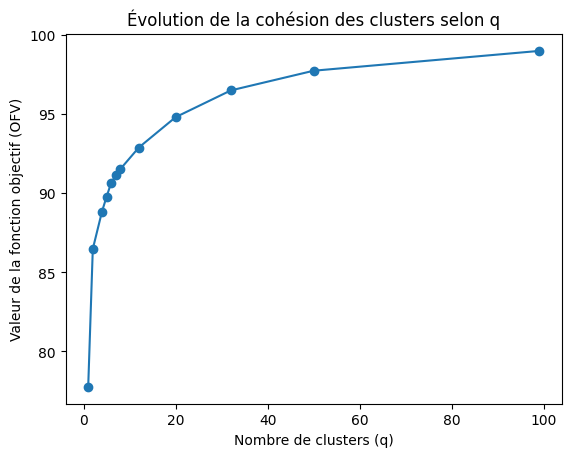

In [ ]:
import matplotlib.pyplot as plt

q_values = [1, 2, 4, 5, 6, 7, 8, 12, 20, 32, 50, 99]
OFV_values = [77.751, 86.475, 88.843, 89.785, 90.663, 91.129, 91.532, 92.891, 94.811, 96.503, 97.748, 99]

plt.plot(q_values, OFV_values, marker='o')
plt.xlabel("Nombre de clusters (q)")
plt.ylabel("Valeur de la fonction objectif (OFV)")
plt.title("Évolution de la cohésion des clusters selon q")
plt.show()


# Task
Generate a plot of the objective function value as a function of the parameter `q` by iterating through different values of `q` in the AMPL model and solving it for each value.

## Prepare for iteration

### Subtask:
Modify the AMPL code to make the `q` value a parameter that can be changed programmatically.
